# **Regression Machine Learning Model - Dataset California House**
## Capstone Project Modul 2 | AI Engineering - Purwadhika
#### By : Christopher Daniel S

[Source Dataset California House](https://drive.google.com/file/d/19ljYU0VYLw1CzZUpp514LXk-pjnPoNkG/view?usp=drive_link)

### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

### **Business Problem Understanding**

**Context**

Dataset ini berisi ringkasan statistik per distrik dari sensus California tahun 1990. Setiap row data merepresentasikan suatu harga rumah (median_house_value) dengan informasi geografis (longitude, latitude), karakteristik perumahan (median age, total rooms, total bedrooms, households), demografi (population, median_income), serta indikator kedekatan dengan laut (ocean_proximity). Meskipun data bersifat historis (1990) dan tidak cocok untuk memprediksi harga sekarang, dataset ini sangat berguna untuk mempelajari pola-pola penentu harga rumah dan membangun model *Machine Learning* regresi untuk memprediksi harga rumah.

Dari perspektif bisnis/analitik, model Machine Learning ini dapat berguna untuk stakeholder berikut :
1.   Analis properti / Investor yang ingin memahami rumah di wilayah mana yang historisnya bernilai lebih tinggi.
2.   Bank / Perusahaan Finansial untuk analisis atau studi risiko historis atau simulasi portofolio.
3. Pembuat Kebijakan atau Institusi Pemerintah yang memerlukan analisis mengenai faktor-faktor yang mempengaruhi harga rumah di suatu wilayah.
4. AI Engineer dan Pelajar yang sedang mempelajari dan mendalami AI / Machine Learning.



**Problem Statement**

Penentu harga rumah dipengaruhi banyak faktor: lokasi geografis, berbagai karakteristik rumah, dan kondisi ekonomi setempat (median income). Bagi stakeholder yang ingin mengetahui dan menilai nilai suatu properti di suatu wilayah atau distrik, proses valuasi manual seringkali kurang akurat karena tidak mempertimbangkan dan menangkap variabel-variabel karakteristik rumah tersebut serta memakan waktu yang lama.

**Permasalahan utama:** Bagaimana merancang sebuah model Machine Learning regresi yang, berdasarkan fitur-fitur distrik dari dataset 1990, dapat memprediksi median house value dengan akurasi yang baik dan memberikan insight yang dapat diinterpretasikan secara cepat dan tepat oleh para stakeholder?

**Batasan scope:** Model *Machine Learning* ini hanya berlaku dalam domain data yang tersedia, prediksi direpresentasikan untuk distrik sensus tahun 1990, bukan sebagai prediksi harga pasar modern (tahun 2025) tanpa data tambahan.

**Goals**

Berdasarkan permasalahan valuasi properti yang telah dijelaskan sebelumnya (California, data sensus 1990), tujuan utama project ini adalah:

1.   Membuat sebuah tool prediksi yang dapat memperkirakan median_house_value dari suatu rumah di suatu distrik berdasarkan data yang tersedia (median_income, housing_median_age, total_rooms, total_bedrooms, households, population, ocean_proximity).
2.   Tool ini akan membantu para stakeholder (investor properti, analis, bank, institusi pemerintah) untuk menilai value rumah relatif dari distrik dan mengambil keputusan analitis berbasis data.



**Analytic Approach**

Selanjutnya, yang perlu kita lakukan adalah menganalisis data California Housing untuk menemukan pola dari fitur data yang ada, seperti median_income, housing_median_age, total_rooms, population, hingga ocean_proximity, yang dapat memengaruhi nilai median harga rumah di setiap distrik.

Selanjutnya, kita akan membangun suatu model regresi yang dapat digunakan sebagai tool prediksi harga rumah di California pada periode tersebut, sehingga dapat membantu para stakeholder dalam memperkirakan nilai properti secara lebih objektif dan berbasis data.

**Metric Evaluation**

Dalam mengevaluasi performa model regresi, beberapa metrik akan digunakan:

* **MAE (Mean Absolute Error)**
    * Mengukur rata-rata selisih absolut antara nilai aktual dengan nilai prediksi. Metrik ini menunjukkan rata-rata besar error dalam satuan harga rumah. Semakin kecil nilainya, semakin baik.

* **MSE (Mean Squared Error)**
    * Mengukur rata-rata kuadrat dari error. Karena error dikuadratkan, MSE lebih sensitif terhadap error yang besar (outlier).

* **RMSE (Root Mean Squared Error)**
    * Merupakan akar dari MSE, sehingga kembali ke satuan asli harga rumah. **RMSE** memberikan penalti lebih besar untuk error besar, dan cocok sebagai metrik utama dalam prediksi harga.

* **MAPE (Mean Absolute Percentage Error)**
    * Mengukur rata-rata persentase error relatif terhadap nilai aktual. Mudah dipahami dalam konteks persentase, namun dapat salah jika terdapat nilai aktual yang sangat kecil.

* **MSPE (Mean Squared Percentage Error)**
    * Mengukur rata-rata kuadrat persentase error. Sama seperti MAPE tetapi lebih sensitif terhadap error besar karena dikuadratkan.

* **MSLE (Mean Squared Logarithmic Error)**
    * Mengukur rata-rata kuadrat dari selisih log(1 + y_actual) dan log(1 + y_pred). Cocok digunakan bila data target bersifat *skewed* (miring) atau memiliki rentang nilai yang luas.

* **R-squared (Coefficient of Determination)**
    * Menunjukkan seberapa besar proporsi variansi dalam data yang dapat dijelaskan oleh model. Nilainya berkisar antara **0–1**; semakin mendekati **1** berarti model semakin baik.

**Kesimpulan Evaluation Metrics**

* Semakin kecil nilai **MAE**, **MSE**, **RMSE**, **MAPE**, **MSPE**, dan **MSLE**, semakin baik performa model.
* Semakin tinggi nilai **R-squared**, semakin baik model dalam menjelaskan variasi data.
* Untuk pemilihan final metric yang digunakan, fokus utama akan diberikan pada **RMSE** (karena sensitif terhadap error besar dan relevan dengan harga rumah), dengan mempertimbangkan juga **MAE** dan **R-squared** sebagai pendukung.

### **Data Understanding**


- Dataset merupakan data perumahan di California berdasarkan sensus tahun 1990.  
- Setiap baris data merepresentasikan informasi agregat dari suatu distrik (bukan rumah individu).  

**Attributes Information**  

| **Attribute**       | **Data Type** | **Description** |
|----------------------|---------------|-----------------|
| longitude            | Float         | Koordinat geografis bujur (arah timur–barat) distrik |
| latitude             | Float         | Koordinat geografis lintang (arah utara–selatan) distrik |
| housing_median_age   | Float/Integer | Usia median rumah di distrik (dalam tahun) |
| total_rooms          | Integer       | Total jumlah ruangan dari semua rumah di distrik |
| total_bedrooms       | Integer       | Total jumlah kamar tidur dari semua rumah di distrik |
| population           | Integer       | Jumlah populasi di distrik |
| households           | Integer       | Jumlah rumah tangga di distrik |
| median_income        | Float         | Pendapatan median rumah tangga di distrik (dalam puluhan ribu dolar AS) |
| median_house_value   | Float         | Nilai median rumah di distrik (target variabel, dalam dolar AS) |
| ocean_proximity      | Object        | Kategori jarak distrik terhadap laut (misalnya: <1H OCEAN, INLAND, ISLAND, NEAR BAY, NEAR OCEAN) |


In [7]:
# Import library yang dibutuhkan untuk dataset California House
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load dataset California Housing
# Path file (data_california_house) sesuai dengan lokasi di Google Drive
df = pd.read_csv('/content/drive/MyDrive/Dokumen/AI ENGINEERING - PURWADHIKA/Capstone 2/data_california_house.csv')

# Tampilkan 5 baris teratas
df.head()

Mounted at /content/drive


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0


#### **Exploratory Data Analysis**

**Distribution of California Housing Price**

Text(0, 0.5, 'Count')

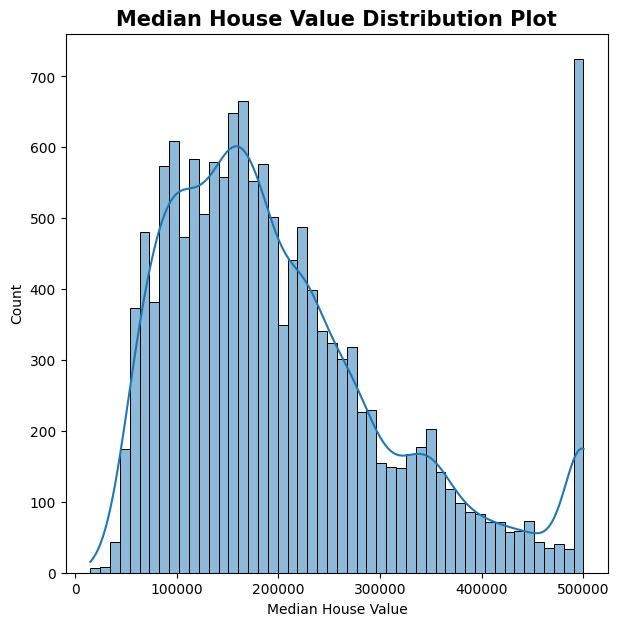

In [ ]:
plt.figure(figsize=(7, 7))
sns.histplot(df['median_house_value'], bins=50, kde=True)
plt.title('Median House Value Distribution Plot', size=15, weight='bold')
plt.xlabel('Median House Value')
plt.ylabel('Count')

Distribusi median house value pada data California Housing menunjukkan pola **right-skewed**, di mana sebagian besar nilai rumah berada pada kisaran 100.000–200.000 USD, namun masih terdapat cukup banyak distrik dengan harga rumah yang lebih tinggi. Selain itu, terlihat adanya penumpukan data pada batas atas $500.000, yang mengindikasikan bahwa terdapat capping atau batas maksimum nilai rumah dalam dataset ini, sehingga harga-harga di atas angka tersebut tidak tercatat secara akurat.

**Distribusi Pendapatan (median_income) vs House Value**

Text(0.5, 1.0, 'Median Income vs Median House Value')

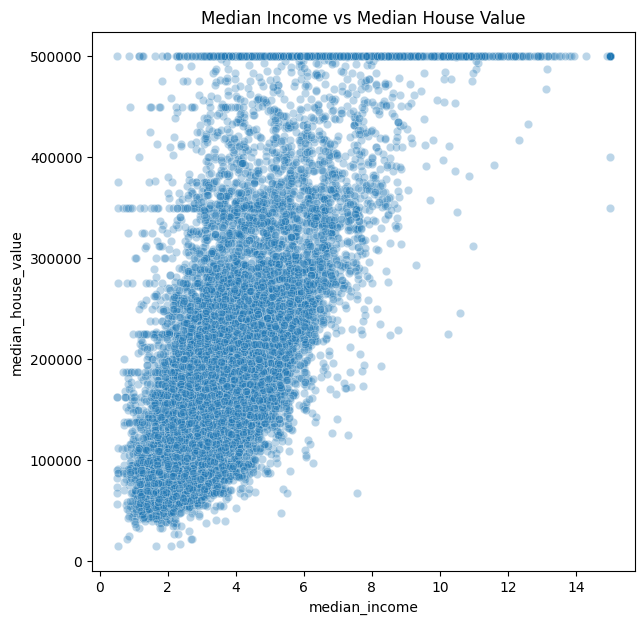

In [ ]:
plt.figure(figsize=(7,7))
sns.scatterplot(x='median_income', y='median_house_value', data=df, alpha=0.3)
plt.title('Median Income vs Median House Value')

Scatterplot antara **median\_income** dan **median\_house\_value** menunjukkan adanya hubungan positif yang cukup kuat, di mana distrik dengan pendapatan median yang lebih tinggi cenderung memiliki nilai rumah median yang lebih tinggi pula. Pola ini memperkuat bahwa income adalah salah satu faktor paling signifikan dalam menentukan harga rumah, meskipun terlihat juga adanya batas atas pada \$500.000 yang menunjukkan efek capping pada dataset.

**Distribusi Lokasi (latitude, longitude) vs House Value**

Text(0.5, 1.0, 'Geographical Distribution of House Values in California')

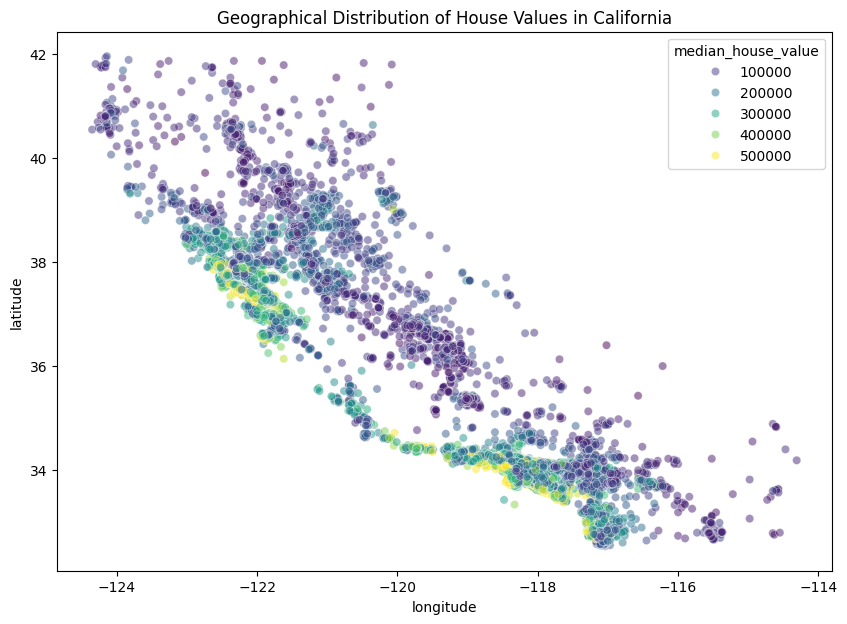

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='longitude', y='latitude', hue='median_house_value',
                palette='viridis', data=df, alpha=0.5)
plt.title('Geographical Distribution of House Values in California')

Plot sebaran geografis berdasarkan **longitude** dan **latitude** memperlihatkan bahwa nilai rumah median di California cenderung lebih tinggi pada wilayah pesisir, khususnya di sekitar area Kota besar seperti Los Angeles dan San Francisco. Pola ini mengindikasikan bahwa faktor lokasi, terutama kedekatan dengan pantai dan pusat kota, berperan penting dalam meningkatkan harga rumah dibandingkan dengan wilayah pedalaman yang jauh dari pantai dan pusat kota.

**Distribusi Ocean Proximity vs Median House Value**

Jumlah distrik berdasarkan kategori ocean proximity:
ocean_proximity
<1H OCEAN     6369
INLAND        4576
NEAR OCEAN    1879
NEAR BAY      1622
ISLAND           2
Name: count, dtype: int64


([0, 1, 2, 3, 4],
 [Text(0, 0, 'INLAND'),
  Text(1, 0, 'NEAR BAY'),
  Text(2, 0, '<1H OCEAN'),
  Text(3, 0, 'NEAR OCEAN'),
  Text(4, 0, 'ISLAND')])

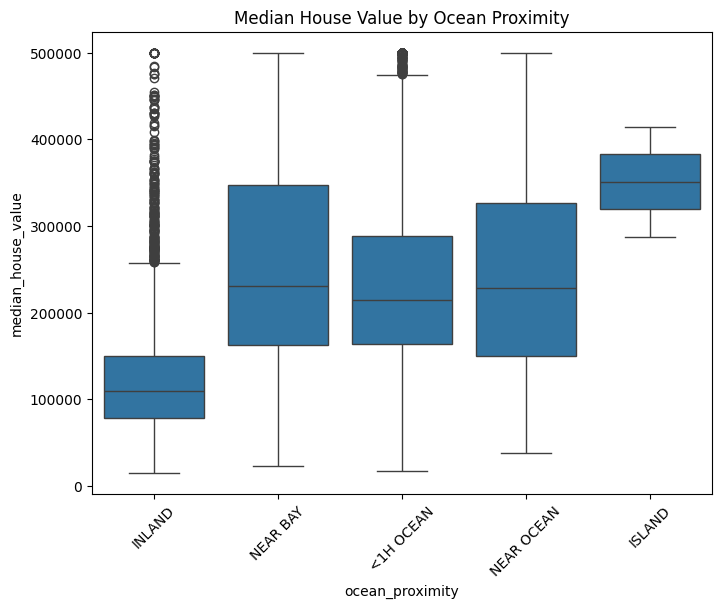

In [ ]:
print("Jumlah distrik berdasarkan kategori ocean proximity:")
print(df['ocean_proximity'].value_counts())

plt.figure(figsize=(8,6))
sns.boxplot(x='ocean_proximity', y='median_house_value', data=df)
plt.title('Median House Value by Ocean Proximity')
plt.xticks(rotation=45)

Boxplot **median\_house\_value** berdasarkan kategori **ocean\_proximity** menunjukkan bahwa rumah di wilayah yang berdekatan dengan laut atau teluk, seperti *NEAR BAY*, *NEAR OCEAN*, dan terutama *ISLAND*, memiliki harga median yang jauh lebih tinggi dibandingkan dengan rumah di wilayah *INLAND*. Hal ini menegaskan bahwa kedekatan dengan pantai merupakan faktor lokasi yang signifikan dalam menentukan nilai properti di California.

**Correlation Heatmap Antar Variabel Data California Housing**

Text(0.5, 1.0, 'Correlation Heatmap')

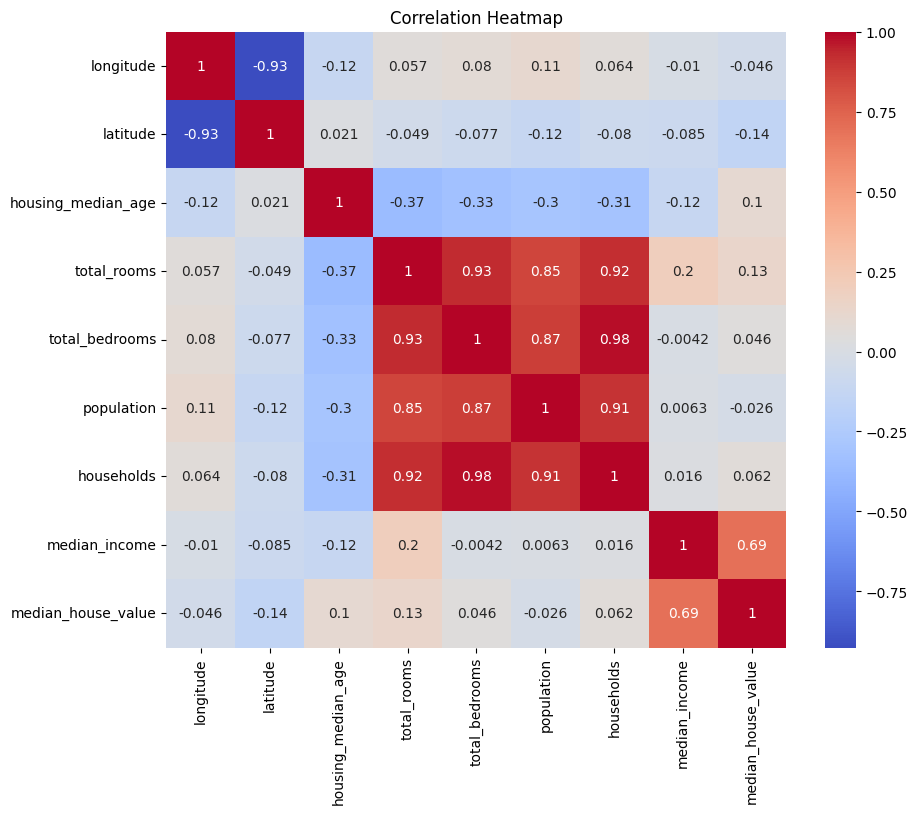

In [ ]:
plt.figure(figsize=(10,8))
# 'ocean_proximity' column di drop karena bukan numerical
sns.heatmap(df.drop('ocean_proximity', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

Heatmap korelasi menunjukkan bahwa variabel **median\_income** memiliki korelasi positif yang paling kuat terhadap **median\_house\_value**, sehingga menjadi faktor utama dalam menentukan harga rumah (namun heatmap tidak termasuk ocean_proximity karena data bukan numerical). Sementara itu, variabel seperti **total\_rooms**, **total\_bedrooms**, **population**, dan **households** saling berkorelasi tinggi satu sama lain, namun hubungannya dengan harga rumah relatif lemah. Hal ini menegaskan bahwa faktor pendapatan lebih berperan penting dibanding jumlah fisik ruangan atau populasi dalam memengaruhi nilai rumah di California.

### **Data Preprocessing**

Pada tahap ini, kita akan melakukan cleaning pada data California Housing yang nantinya akan digunakan untuk proses analisis dan pemodelan machine learning. Beberapa hal yang perlu dilakukan adalah:
- Menambahkan kolom `id` sebagai unique id, karena dataset ini tidak memiliki kolom ID unik sehingga setiap baris data dapat lebih mudah dilacak.
- Menghapus fitur yang tidak relevan dengan tujuan prediksi harga rumah.
- Melakukan penanganan terhadap missing value jika ada. Treatment bisa berupa drop kolom/baris atau mengisi nilai yang hilang dengan nilai yang sesuai.
- Menyimpan dataframe hasil preprocessing terpisah dari dataset awal agar lebih aman.

Untuk proses data preprocessing dan feature engineering, kita akan menggunakan dataframe hasil duplikasi dari dataframe asli.


In [ ]:
# Membuat duplikasi dataframe
df_model = df.copy()

# Menambahkan kolom unique ID
df_model.insert(0, 'id', range(1, len(df_model) + 1))

# Cek info lebih detail untuk setiap fitur
listItem = []

for col in df_model.columns:
    listItem.append([
        col,                                # nama fitur
        df_model[col].dtype,                # tipe data
        df_model[col].isna().sum(),         # jumlah missing value
        round((df_model[col].isna().sum()/len(df_model[col]))*100, 2), # persentase missing
        df_model[col].nunique(),            # jumlah unique values
        list(df_model[col].drop_duplicates().sample(2).values) # contoh 2 nilai unik
    ])

df_model_desc = pd.DataFrame(
    columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
    data=listItem
)

df_model_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,id,int64,0,0.00,14448,"[14285, 1611]"
1,longitude,float64,0,0.00,806,"[-118.86, -116.05]"
2,latitude,float64,0,0.00,836,"[39.91, 40.87]"
3,housing_median_age,float64,0,0.00,52,"[20.0, 38.0]"
4,total_rooms,float64,0,0.00,5227,"[13724.0, 2575.0]"
5,total_bedrooms,float64,137,0.95,1748,"[282.0, 2628.0]"
6,population,float64,0,0.00,3498,"[1194.0, 6780.0]"
7,households,float64,0,0.00,1649,"[1370.0, 686.0]"
8,median_income,float64,0,0.00,9797,"[2.8827, 7.2582]"
9,ocean_proximity,object,0,0.00,5,"[NEAR BAY, INLAND]"


Dari hasil tabel deskripsi fitur di atas, kita dapat melihat informasi detail mengenai tipe data, jumlah missing value, persentase missing value, jumlah unique value, hingga beberapa contoh nilai unik dari tiap fitur.  

Selain itu, dengan penambahan kolom `id`, setiap baris data kini memiliki identitas unik sehingga lebih mudah untuk dilakukan tracking, terutama ketika dilakukan proses pembersihan data maupun pemodelan.

Selanjutnya, kita perlu mengobservasi lebih lanjut kolom yang memiliki missing value (misalnya `total_bedrooms`) untuk menentukan langkah treatment yang tepat, apakah akan di-drop atau diimputasi dengan nilai tertentu.

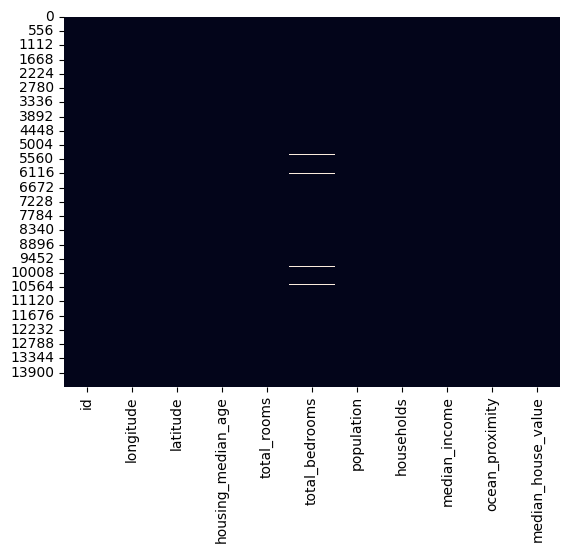

In [ ]:
# Missing value heatmap
sns.heatmap(df_model.isnull(), cbar=False);

Dari hasil pengecekan, diketahui bahwa hanya terdapat **1 fitur yang memiliki missing value**, yaitu `total_bedrooms`. Jumlah data yang hilang pada kolom ini adalah sebanyak **137 baris** atau sekitar **0,95% dari total data**. Persentase ini tergolong sangat kecil sehingga tidak akan terlalu memengaruhi kualitas dataset secara keseluruhan. Meski demikian, tetap perlu dilakukan treatment agar tidak menimbulkan error pada saat pemodelan, misalnya dengan melakukan imputasi menggunakan nilai median atau mean.

Sementara itu, fitur lain tidak memiliki missing value sehingga tidak memerlukan perlakuan khusus. Hasil visualisasi heatmap juga memperkuat temuan ini karena hanya `total_bedrooms` yang menunjukkan adanya nilai kosong.

In [ ]:
# Cek data duplikat
df_model.duplicated().sum()

np.int64(0)

Untuk pengecekan data duplikat, hasil analisis menunjukkan bahwa dataset **tidak memiliki data yang duplikat**. Hal ini dapat dipastikan dengan melihat hasil fungsi `duplicated().sum()` yang bernilai nol. Dengan demikian, kita tidak perlu melakukan action penghapusan data duplikat pada tahap preprocessing ini.

**Drop Columns**

Pada dataset California Housing, tidak semua kolom relevan untuk prediksi harga rumah. Dalam hal ini, kolom 'id' (yang baru ditambahkan untuk unique identifier) tidak akan kita gunakan sebagai variabel prediktor.

In [ ]:
# Drop kolom yang tidak relevan
df_model.drop(['id'], axis=1, inplace=True)

# Cek info dataset
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


Sekarang kolom 'id', sudah tidak ada.

**Missing Value**

Cek kembali jumlah missing value setelah drop kolom.

In [ ]:
# Cek missing value
df_model.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,137
population,0
households,0
median_income,0
ocean_proximity,0
median_house_value,0


<Axes: >

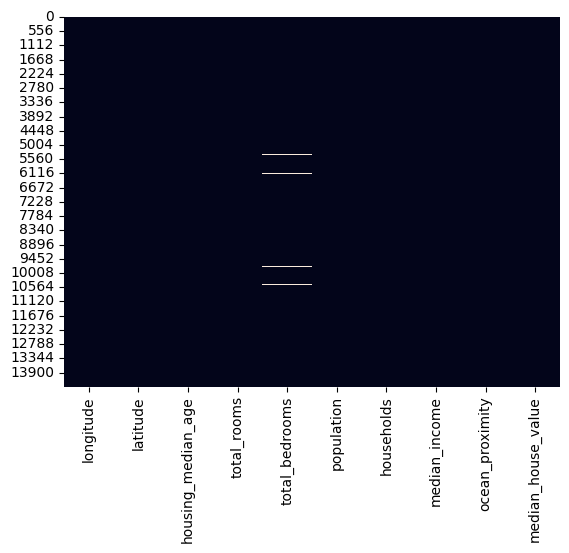

In [ ]:
# Visualisasi heatmap missing value
sns.heatmap(df_model.isnull(), cbar=False)

Dari hasil pengecekan missing value, ditemukan bahwa hanya terdapat satu fitur yang memiliki nilai kosong, yaitu **`total_bedrooms`** dengan jumlah sebanyak **137 baris** atau sekitar **0,95% dari total data**. Sementara itu, semua fitur lainnya tidak memiliki missing value. Persentase data yang hilang ini relatif kecil, tetapi tetap perlu ditangani agar tidak menimbulkan error pada saat proses analisis maupun pemodelan machine learning.

**Imputasi Missing Value**

Satu-satunya fitur yang memiliki missing value adalah `total_bedrooms`.
Kita akan melakukan imputasi menggunakan nilai median agar distribusi data
tidak terlalu bias oleh outliers.

In [ ]:
# Cek jumlah missing sebelum imputasi
print("Jumlah missing sebelum imputasi:", df_model['total_bedrooms'].isnull().sum())

# Imputasi dengan median
median_value = df_model['total_bedrooms'].median()
df_model['total_bedrooms'].fillna(median_value, inplace=True)

# Cek kembali jumlah missing setelah imputasi
print("Jumlah missing setelah imputasi:", df_model['total_bedrooms'].isnull().sum())

Jumlah missing sebelum imputasi: 137
Jumlah missing setelah imputasi: 0


Untuk menangani nilai yang hilang pada fitur `total_bedrooms`, dilakukan imputasi menggunakan nilai **median**. Pemilihan median dilakukan karena lebih tahan terhadap pengaruh outliers dibandingkan mean.

Hasilnya, jumlah missing value pada fitur `total_bedrooms` yang sebelumnya sebanyak 137 baris kini sudah menjadi **0**, sehingga dataset sudah bersih dari missing value dan siap digunakan untuk tahapan analisis selanjutnya.

**Descriptive Statistics**

Dilakukan analisa Deskriptif untuk mengecek nilai minimum, maksimum, dan distribusi pada setiap fitur numerikal
untuk mendeteksi adanya nilai yang tidak masuk akal (misalnya negatif pada kolom tertentu).

In [ ]:
# Statistik deskriptif untuk fitur numerikal
num_features = [col for col in df_model.columns if df_model[col].dtypes != 'object']
df_model[num_features].describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,-119.566647,35.630093,28.618702,2640.132683,537.281561,1425.157323,499.508929,3.866667,206824.624516
std,2.006587,2.140121,12.596694,2191.612441,421.683154,1149.580157,383.098390,1.891158,115365.476182
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1451.000000,296.000000,784.000000,279.000000,2.570600,119600.000000
50%,-118.490000,34.260000,29.000000,2125.000000,435.000000,1165.000000,410.000000,3.539100,180000.000000
75%,-118.000000,37.710000,37.000000,3148.000000,645.000000,1724.000000,604.000000,4.736100,263900.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Berdasarkan hasil statistik deskriptif, diketahui bahwa seluruh fitur numerikal pada dataset memiliki nilai minimum yang masuk akal, tidak ada nilai negatif. Variabel `housing_median_age` berkisar antara 1 hingga 52 tahun, sedangkan variabel `median_income` memiliki rentang dari 0,4999 hingga 15, menunjukkan perbedaan tingkat pendapatan yang cukup signifikan antar distrik.  

Fitur `total_rooms`, `total_bedrooms`, `population`, dan `households` memiliki sebaran nilai yang cukup lebar dengan standar deviasi tinggi, serta nilai maksimum yang jauh lebih besar dibandingkan kuartil ketiga, yang mengindikasikan adanya **outliers** pada fitur-fitur tersebut.  

Untuk variabel target `median_house_value`, terlihat bahwa harga rumah berada pada rentang 14.999 hingga 500.001, dengan nilai maksimum ini menunjukkan adanya batasan (capping) pada data. Secara keseluruhan, hasil statistik deskriptif ini mengonfirmasi adanya distribusi yang skewed dan potensi outliers, yang perlu dipertimbangkan lebih lanjut pada tahap preprocessing berikutnya.

**Correlation Check**

Mengecek korelasi antar fitur numerikal, terutama hubungan dengan target 'median_house_value'.

Text(0.5, 1.0, 'Correlation Heatmap')

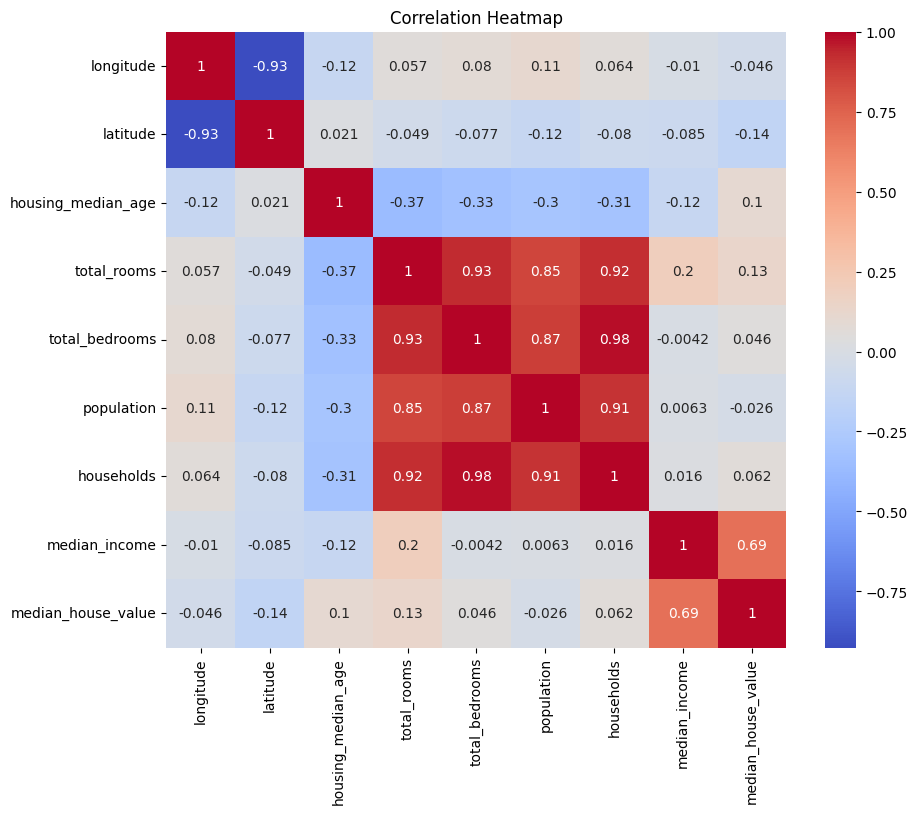

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10,8))
# 'ocean_proximity' column di drop karena bukan numerical
sns.heatmap(df.drop('ocean_proximity', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

Hasil korelasi antar variabel numerikal menunjukkan bahwa **median_income** memiliki hubungan paling kuat dengan **median_house_value**, menandakan bahwa tingkat pendapatan penduduk merupakan prediktor utama dalam menentukan harga rumah. Sebaliknya, fitur-fitur seperti `total_rooms`, `total_bedrooms`, `population`, dan `households` memiliki korelasi yang sangat tinggi satu sama lain, namun kontribusinya terhadap harga rumah relatif kecil. Hal ini menunjukkan bahwa ukuran fisik rumah atau jumlah penghuni tidak secara langsung memengaruhi nilai rumah sekuat faktor pendapatan.  

Selain itu, variabel kategorikal seperti `ocean_proximity` tidak muncul dalam heatmap ini karena bukan data numerik, namun tetap berpotensi berpengaruh.

**Outliers Detection**

Untuk mengetahui outlier, digunakan grafik boxplot untuk melihat persebaran nilai pada setiap fitur numerikal, lalu mendeteksi outliers dengan metode IQR.

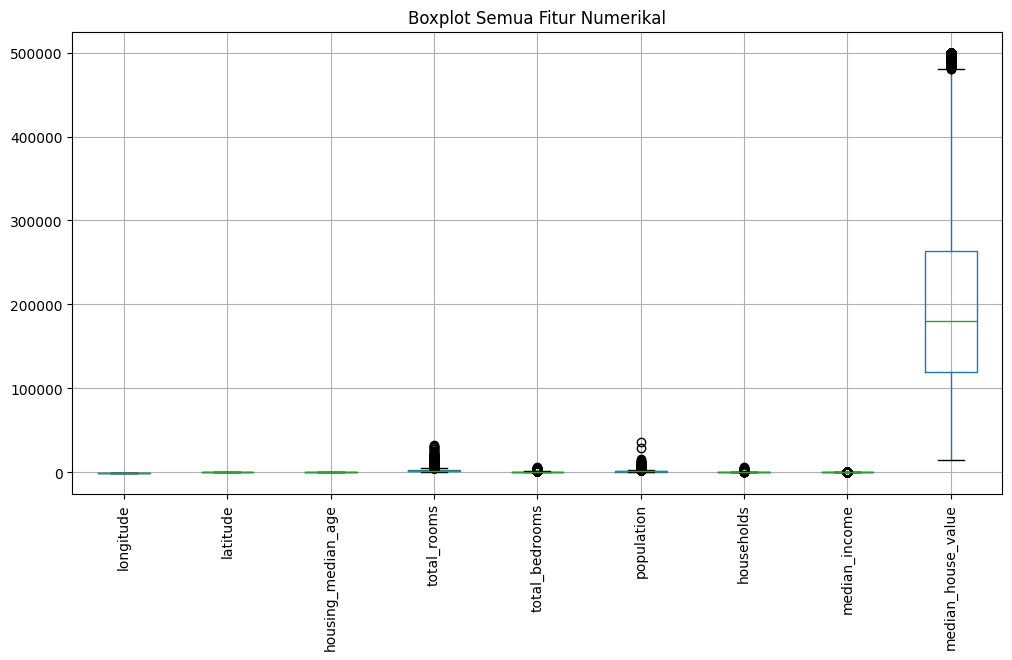

In [ ]:
# Boxplot semua fitur numerikal
plt.figure(figsize=(12,6))
df_model.boxplot(rot=90)
plt.title('Boxplot Semua Fitur Numerikal')
plt.show()

In [ ]:
# Fungsi untuk mengecek outliers dengan IQR
def find_anomalies(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = 1.5 * iqr
    lower = q1 - limit
    upper = q3 + limit
    print(f'IQR: {iqr}')
    print(f'Batas bawah: {lower}')
    print(f'Batas atas: {upper}')

In [ ]:
# Outliers pada fitur median_house_value
find_anomalies(df_model['median_house_value'])

IQR: 144300.0
Batas bawah: -96850.0
Batas atas: 480350.0


In [ ]:
# Outliers pada fitur median_income
find_anomalies(df_model['median_income'])

IQR: 2.1655000000000006
Batas bawah: -0.6776500000000012
Batas atas: 7.984350000000001


In [ ]:
# Outliers pada fitur total_rooms
find_anomalies(df_model['total_rooms'])

IQR: 1697.0
Batas bawah: -1094.5
Batas atas: 5693.5


In [ ]:
# Outliers pada fitur total_bedrooms
find_anomalies(df_model['total_bedrooms'])

IQR: 349.0
Batas bawah: -227.5
Batas atas: 1168.5


In [ ]:
# Outliers pada fitur population
find_anomalies(df_model['population'])

IQR: 940.0
Batas bawah: -626.0
Batas atas: 3134.0


In [ ]:
# Outliers pada fitur households
find_anomalies(df_model['households'])

IQR: 325.0
Batas bawah: -208.5
Batas atas: 1091.5


Hasil analisis boxplot dan perhitungan IQR menunjukkan bahwa beberapa fitur numerikal pada dataset
California Housing memiliki banyak nilai outliers:

- Pada fitur **median_house_value**, nilai IQR adalah 144.300 dengan batas atas 480.350. Namun, terdapat banyak
  data yang mencapai angka maksimum 500.001, yang menandakan adanya **capping** pada dataset. Dengan kata lain,
  nilai rumah di atas batas tertentu tidak ditampilkan secara aktual, melainkan dipotong pada angka maksimum ini.

- Fitur **median_income** memiliki IQR sebesar 2,16 dengan batas atas 7,98, sementara data maksimum mencapai 15.
  Hal ini menunjukkan bahwa beberapa distrik dengan pendapatan sangat tinggi terdeteksi sebagai outliers.

- Pada fitur **total_rooms**, IQR bernilai 1697 dengan batas atas 5693, sedangkan data maksimum mencapai lebih dari
  32.000. Artinya, ada sejumlah rumah dengan jumlah ruangan yang sangat jauh lebih banyak dibandingkan mayoritas
  rumah lain.

- Fitur **total_bedrooms** memiliki IQR sebesar 349 dengan batas atas 1168, namun nilai maksimum mencapai lebih dari 6000. Kondisi ini kembali menegaskan adanya rumah dengan jumlah kamar tidur yang jauh lebih besar daripada kebanyakan data.

- Pada fitur **population**, nilai IQR sebesar 940 dengan batas atas 3134, sementara jumlah penduduk maksimum dalam
  satu distrik bisa mencapai lebih dari 35.000. Hal ini menandakan adanya distrik dengan populasi yang sangat padat
  dibandingkan mayoritas distrik lainnya.

- Fitur **households** memiliki IQR sebesar 325 dengan batas atas 1091, namun data maksimum mencapai lebih dari 6000.
  Dengan demikian, terdapat distrik dengan jumlah rumah tangga yang jauh di atas mayoritas.

Secara keseluruhan, hasil ini memperlihatkan bahwa dataset California Housing memiliki cukup banyak outliers, terutama pada fitur-fitur terkait jumlah ruangan, kamar tidur, populasi, dan rumah tangga. Adanya outliers ini dapat memengaruhi distribusi data dan performa model regresi. Oleh karena itu, perlu dipertimbangkan langkah lanjutan dalam preprocessing, apakah dilakukan filtering, transformasi, atau tetap dipertahankan dengan alasan domain knowledge.

Selanjutnya, kita dapat memulai feature engineering terhadap fitur-fitur numerikal tersebut.

**Median House Value**

In [ ]:
# Cek deskriptif statistik kolom median_house_value
df_model['median_house_value'].describe()

,median_house_value
count,14448.000000
mean,206824.624516
std,115365.476182
min,14999.000000
25%,119600.000000
50%,180000.000000
75%,263900.000000
max,500001.000000


In [ ]:
# Cek jumlah data di atas batas IQR (480350)
df_model[df_model['median_house_value'] > 480350].count()['median_house_value']

np.int64(757)

Terlihat bahwa banyak data yang berada di batas maksimum 500001, yang menandakan adanya capping pada dataset. Untuk mengurangi bias pada model, salah satu pendekatan adalah melakukan filtering sehingga hanya data dengan nilai median_house_value di bawah batas IQR (480350) yang digunakan untuk pemodelan.

In [ ]:
# Filtering data dengan house value <= 480350
df_model = df_model[(df_model['median_house_value'] <= 480350)]

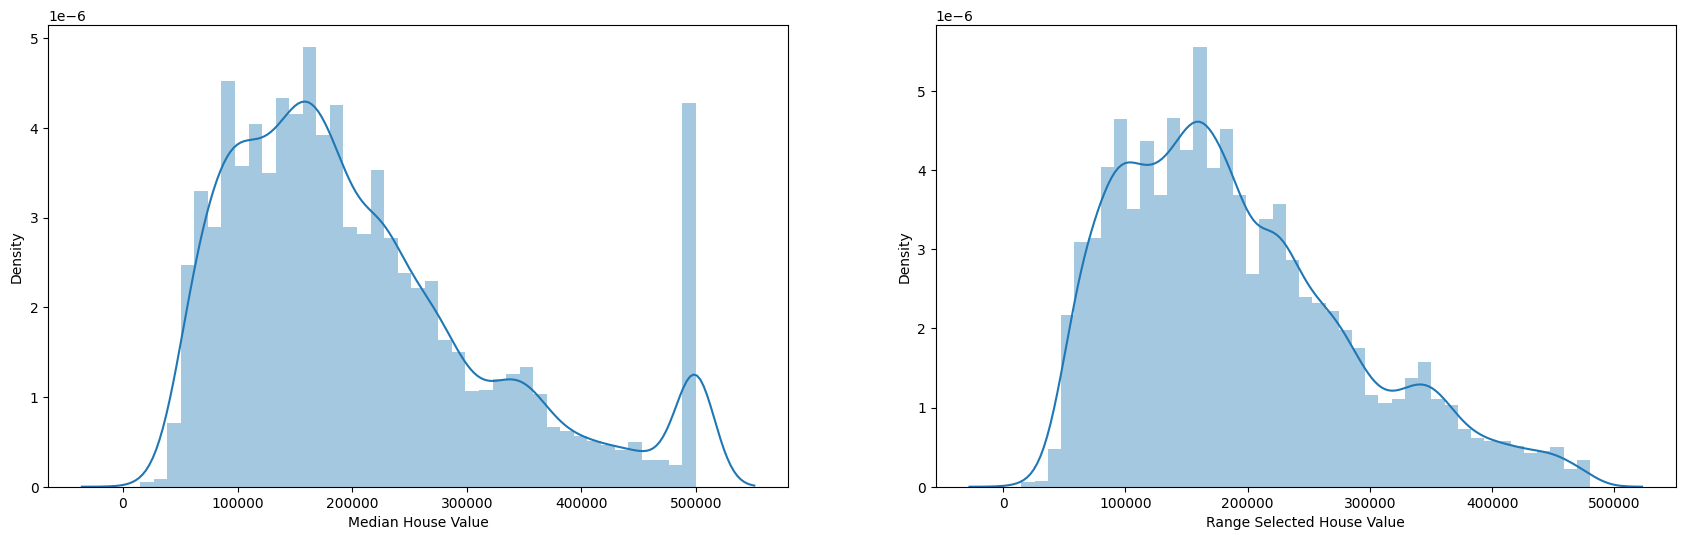

In [ ]:
# Plot distribusi sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['median_house_value'], ax=axes[0])
sns.distplot(df_model['median_house_value'], ax=axes[1])
axes[0].set_xlabel('Median House Value')
axes[1].set_xlabel('Range Selected House Value');

In [ ]:
# Statistik deskriptif setelah filtering
df_model['median_house_value'].describe()

,median_house_value
count,13691.000000
mean,190661.719159
std,95174.556513
min,14999.000000
25%,116300.000000
50%,173400.000000
75%,246200.000000
max,480100.000000


Setelah dilakukan filtering dengan membatasi nilai median_house_value ≤ 480.350 (sesuai batas atas IQR), jumlah data yang tersisa adalah 13.691 baris. Statistik deskriptif menunjukkan bahwa nilai rata-rata harga rumah berada di sekitar 190.662 USD, dengan standar deviasi sebesar 95.174 USD. Nilai minimum rumah dalam dataset adalah 14.999 USD, sedangkan nilai maksimum setelah filtering mencapai 480.100 USD. Distribusi harga rumah terlihat lebih seimbang, dengan nilai kuartil ke-1 (Q1) sebesar 116.300 USD, median (Q2) 173.400 USD, dan kuartil ke-3 (Q3) 246.200 USD. Hal ini menegaskan bahwa mayoritas harga rumah berada pada kisaran 116 ribu hingga 246 ribu USD, sementara nilai ekstrem di atas 500 ribu USD berhasil dieliminasi.

**Median Income**

Distribusi median_income menunjukkan adanya beberapa distrik dengan nilai sangat tinggi (hingga 15), sementara batas IQR ada di sekitar 10.91. Hal ini menandakan adanya outliers pada sisi kanan distribusi.

In [ ]:
# Cek deskriptif statistik median_income
df_model['median_income'].describe()

,median_income
count,13691.000000
mean,3.657214
std,1.543566
min,0.499900
25%,2.525450
50%,3.446400
75%,4.561100
max,15.000100


In [ ]:
# Cek jumlah data dengan income > 10.91
df_model[df_model['median_income'] > 10.91].count()['median_income']

np.int64(8)

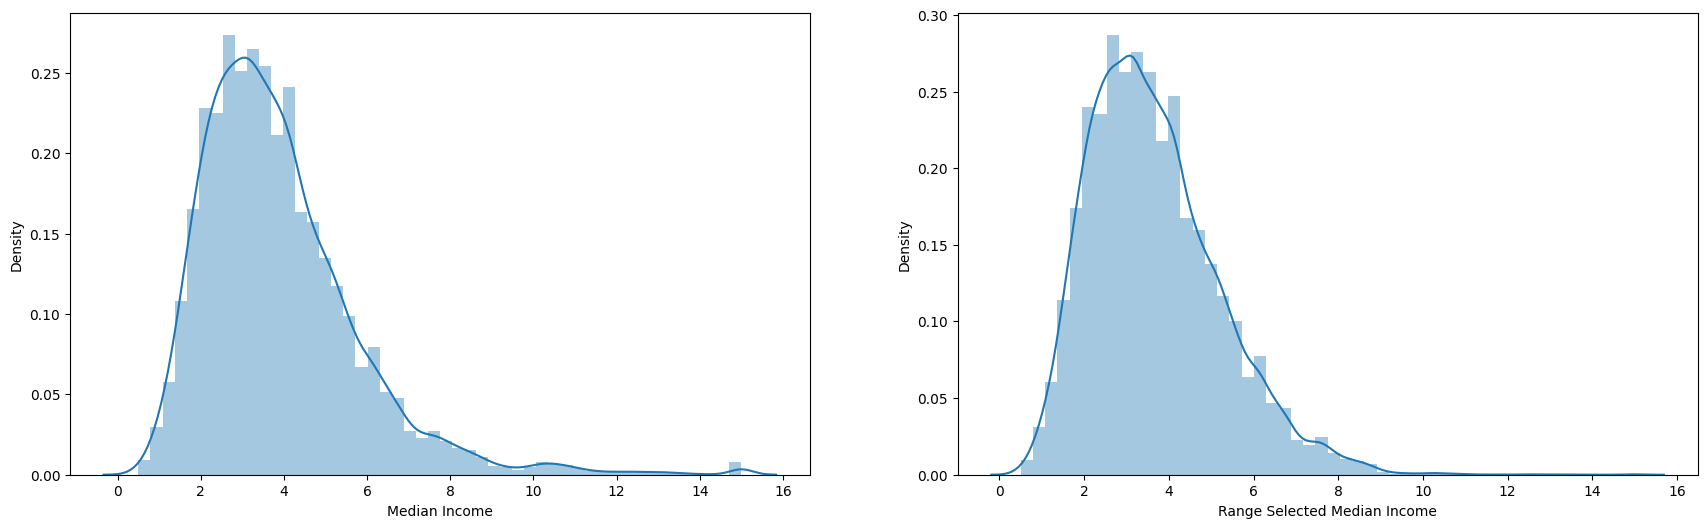

In [ ]:
# Plot distribusi median_income
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['median_income'], ax=axes[0])
sns.distplot(df_model['median_income'], ax=axes[1])
axes[0].set_xlabel('Median Income')
axes[1].set_xlabel('Range Selected Median Income');

Fitur median_income menunjukkan distribusi pendapatan median penduduk pada setiap distrik di California. Jumlah data yang tersedia konsisten dengan dataset hasil filtering, tanpa adanya missing value. Plot distribusi memperlihatkan pola yang condong ke kanan (positively skewed), di mana mayoritas distrik memiliki pendapatan median di kisaran 2 hingga 6 (dalam puluhan ribu USD), sementara hanya sebagian kecil distrik yang memiliki pendapatan di atas 10. Kondisi ini menegaskan bahwa sebagian besar masyarakat California dalam dataset berada pada tingkat pendapatan menengah, dengan sedikit distrik berpendapatan sangat tinggi yang terdeteksi sebagai outliers.

**Total Rooms, Bedrooms, Population, Households**

Fitur-fitur jumlah ini sangat besar skalanya dan memiliki banyak outliers.
Untuk membuatnya lebih informatif, kita bisa membuat fitur baru dalam bentuk rasio, seperti jumlah kamar per rumah tangga, kamar tidur per rumah tangga serta rasio populasi per rumah tangga.

In [ ]:
# Buat fitur baru berbasis rasio
df_model['rooms_per_household'] = df_model['total_rooms'] / df_model['households']
df_model['bedrooms_per_household'] = df_model['total_bedrooms'] / df_model['households']
df_model['population_per_household'] = df_model['population'] / df_model['households']

In [ ]:
# Cek hasil
df_model[['rooms_per_household', 'bedrooms_per_household', 'population_per_household']].describe()

,rooms_per_household,bedrooms_per_household,population_per_household
count,13691.000000,13691.000000,13691.000000
mean,5.357348,1.097894,3.066297
std,2.300533,0.471505,7.044251
min,0.846154,0.283019,0.750000
25%,4.424682,1.005188,2.444444
50%,5.182081,1.048819,2.836478
75%,5.957778,1.100473,3.304322
max,132.533333,34.066667,599.714286


Hasil feature engineering menunjukkan bahwa rasio rooms_per_household memiliki nilai rata-rata sekitar 5,35, dengan sebaran mayoritas rumah tangga berada pada kisaran 4–6 ruangan per rumah tangga. Namun, terdapat nilai ekstrem hingga lebih dari 132 ruangan per rumah tangga, yang jelas merupakan outliers.

Untuk rasio bedrooms_per_household, distribusi jauh lebih stabil dengan rata-rata sekitar 1,09 kamar tidur per rumah tangga, serta nilai kuartil yang sangat rapat (sekitar 1), meskipun ada beberapa outliers ekstrem hingga 34 kamar tidur per rumah tangga.

Sementara itu, pada rasio population_per_household, nilai rata-rata tercatat sekitar 3,07 dengan mayoritas rumah tangga memiliki 2–3 orang per unit, namun kembali ditemukan outliers besar hingga hampir 600 orang per rumah tangga.

Temuan ini menegaskan bahwa meskipun sebagian besar distribusi data rasional, terdapat sejumlah nilai ekstrem yang bisa memengaruhi analisis dan model prediksi sehingga perlu dipertimbangkan untuk dilakukan filtering atau transformasi lebih lanjut.

**Lanjutan Feature Engineering (Total Rooms, Bedrooms, Population, Households)**

Dari hasil analisis, ditemukan adanya nilai outliers ekstrem pada fitur `rooms_per_household`, `bedrooms_per_household`, dan `population_per_household`.
Sebagai langkah preprocessing, kita akan:

1. **Filtering**: Menghapus nilai outliers yang tidak realistis, misalnya rumah dengan > 15 rooms per household, > 5 bedrooms per household, atau > 20 population per household.
2. **Log Transformation**: Menerapkan transformasi log pada variabel yang distribusinya masih sangat skewed, untuk mengurangi skewness dan membuat distribusi lebih mendekati normal.
3. **Scaling**: Melakukan standardisasi (StandardScaler) agar semua fitur numerik berada pada skala yang sebanding.

In [ ]:
# Filtering data berdasarkan domain knowledge
df_model = df_model[
    (df_model['rooms_per_household'] <= 15) &
    (df_model['bedrooms_per_household'] <= 5) &
    (df_model['population_per_household'] <= 20)
]

print("Jumlah data setelah filtering:", df_model.shape[0])

Jumlah data setelah filtering: 13607


In [ ]:
# Log Transformation pada fitur yang sangat skewed
for col in ['rooms_per_household', 'bedrooms_per_household', 'population_per_household']:
    df_model[col + '_log'] = np.log1p(df_model[col])  # log(1+x) agar aman untuk nilai 0

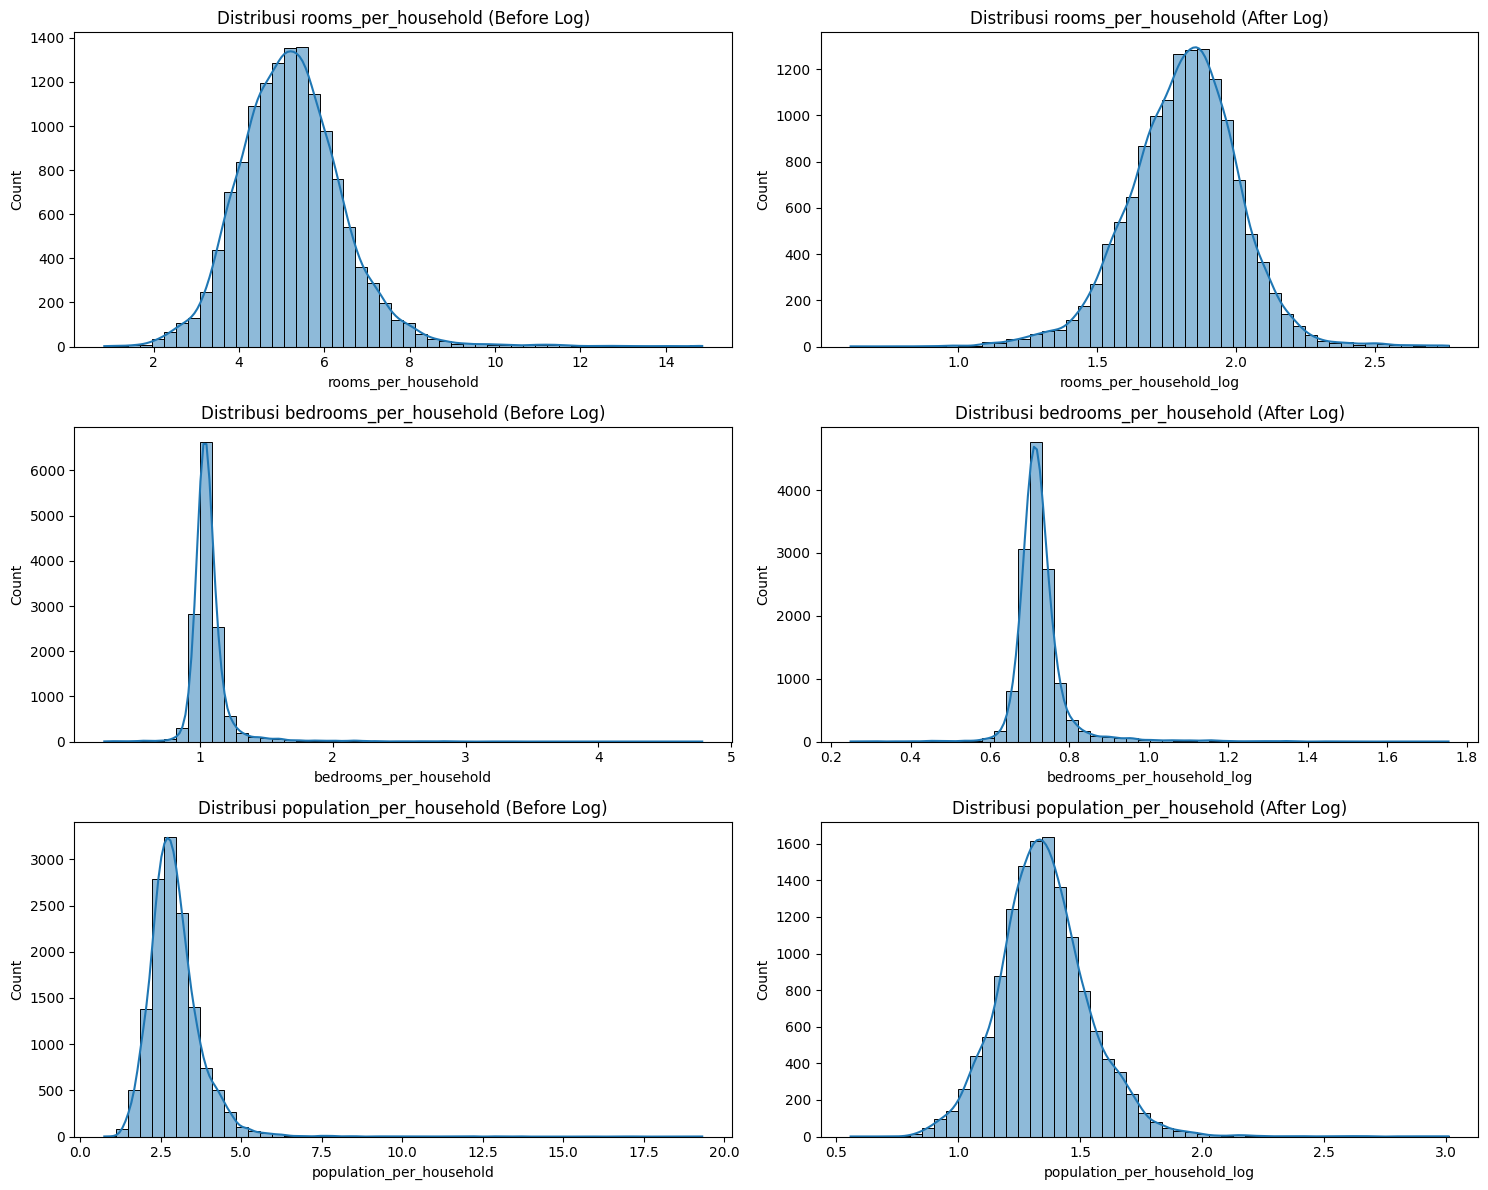

In [ ]:
# Plot distribusi sebelum dan sesudah log transform
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
cols = ['rooms_per_household', 'bedrooms_per_household', 'population_per_household']
for i, col in enumerate(cols):
    sns.histplot(df_model[col], bins=50, ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f'Distribusi {col} (Before Log)')
    sns.histplot(df_model[col + '_log'], bins=50, ax=axes[i, 1], kde=True)
    axes[i, 1].set_title(f'Distribusi {col} (After Log)')
plt.tight_layout()
plt.show()

In [ ]:
# Scaling pada semua fitur numerikal
from sklearn.preprocessing import StandardScaler

num_features = df_model.select_dtypes(include=['int64','float64']).columns
scaler = StandardScaler()
df_model_scaled = df_model.copy()
df_model_scaled[num_features] = scaler.fit_transform(df_model[num_features])

print("Scaling selesai. Dataset siap digunakan untuk modeling.")
df_model_scaled.head()

Scaling selesai. Dataset siap digunakan untuk modeling.


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,rooms_per_household,bedrooms_per_household,population_per_household,rooms_per_household_log,bedrooms_per_household_log,population_per_household_log
0,-0.114582,0.506105,1.891583,-1.146641,-1.206521,-1.081305,-1.203774,-1.090996,INLAND,-1.504463,-1.931630,-2.105056,2.110501,-2.383418,-2.703532,2.124456
1,-1.318791,0.989617,1.170750,-0.732615,-0.497851,-0.526582,-0.588284,-0.905838,NEAR BAY,-0.953314,-1.242253,0.619580,0.068111,-1.350468,0.753565,0.181613
2,0.756230,-0.823553,-0.911655,-0.119125,-0.337219,-0.051228,-0.362345,1.714274,<1H OCEAN,0.997227,0.977839,0.078140,0.963746,1.003307,0.132095,1.123269
3,0.636804,-0.735219,-0.911655,-0.045927,1.552570,1.384324,1.289348,-1.256497,<1H OCEAN,-0.165959,-2.154704,0.686466,0.105353,-2.769176,0.828431,0.224339
4,-0.124534,0.506105,1.731398,-0.844700,-0.814390,-0.725005,-0.873954,-0.931659,INLAND,-1.381636,-0.489755,0.493292,0.758374,-0.423222,0.611094,0.921833


Setelah dilakukan filtering pada fitur turunan (`rooms_per_household`,
`bedrooms_per_household`, dan `population_per_household`), jumlah data berkurang menjadi **13.607 observasi**, dengan data outliers ekstrem yang tidak realistis berhasil dihilangkan.

Transformasi log yang diterapkan pada ketiga variabel tersebut berhasil mengurangi skewness dan membuat distribusi data lebih mendekati normal. Misalnya, distribusi `population_per_household` yang sebelumnya sangat right-skewed kini terlihat lebih simetris setelah transformasi log.

Tahap selanjutnya adalah **scaling** menggunakan StandardScaler agar semua fitur numerikal berada pada skala yang sebanding. Proses ini penting untuk memastikan algoritma machine learning (terutama yang berbasis jarak dan gradien descent) dapat bekerja secara optimal.

Dengan demikian, dataset kini telah bersih, ditransformasi, dan distandarisasi sehingga siap digunakan untuk tahap **pemodelan regresi**.

**Clean Dataset**

Cek kondisi dataset akhir setelah proses Data Preprocessing.

In [ ]:
# Cek beberapa baris awal
df_model.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,rooms_per_household,bedrooms_per_household,population_per_household,rooms_per_household_log,bedrooms_per_household_log,population_per_household_log
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0,2.800000,0.700000,4.825000,1.335001,0.530628,1.762159
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0,3.671480,1.184116,3.018051,1.541476,0.781211,1.390797
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0,6.478022,1.087912,3.810440,2.011968,0.736165,1.570788
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0,2.518000,1.196000,3.051000,1.257893,0.786638,1.398964
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0,4.622754,1.161677,3.628743,1.726822,0.770884,1.532285


In [ ]:
# Cek info dataset
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13607 entries, 0 to 14447
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   longitude                     13607 non-null  float64
 1   latitude                      13607 non-null  float64
 2   housing_median_age            13607 non-null  float64
 3   total_rooms                   13607 non-null  float64
 4   total_bedrooms                13607 non-null  float64
 5   population                    13607 non-null  float64
 6   households                    13607 non-null  float64
 7   median_income                 13607 non-null  float64
 8   ocean_proximity               13607 non-null  object 
 9   median_house_value            13607 non-null  float64
 10  rooms_per_household           13607 non-null  float64
 11  bedrooms_per_household        13607 non-null  float64
 12  population_per_household      13607 non-null  float64
 13  rooms_

Tahap data preprocessing dan feature engineering telah selesai dilakukan.
Dataset akhir kini terdiri dari **13.607 baris** dan **16 kolom** dengan seluruh nilai non-null, sehingga tidak ada lagi missing value. Selain fitur asli, dataset juga telah dilengkapi dengan fitur turunan (`rooms_per_household`, `bedrooms_per_household`, dan `population_per_household`) serta versi transformasi log dari masing-masing fitur tersebut.  

Dengan dataset yang sudah bersih, lengkap, dan siap pakai, tahap selanjutnya adalah melanjutkan ke proses **pemodelan regresi** untuk memprediksi nilai median harga rumah.

### **Modeling**

In [ ]:
# Import library untuk modeling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

**Encoding**

Pada dataset California Housing, satu-satunya fitur kategorikal adalah `ocean_proximity`.

Fitur ini perlu diubah menjadi numerikal agar dapat digunakan pada model.
Kita akan menggunakan OneHotEncoder untuk mengubah kategori menjadi dummy variables.

In [ ]:
# Mengubah fitur kategorikal menjadi numerikal
transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first'), ['ocean_proximity'])
], remainder='passthrough')

**Data Splitting**

Pada tahap ini, dataset dipisahkan menjadi dua bagian, yaitu variabel independen (fitur prediktor) dan variabel dependen (target). Fitur prediktor terdiri dari karakteristik rumah dan lingkungan seperti lokasi, jumlah ruangan, jumlah kamar tidur, populasi, hingga jarak ke laut, sedangkan target yang diprediksi adalah median_house_value.

In [ ]:
# Memisahkan data independen variabel dengan target
X = df_model.drop(['median_house_value'], axis=1)
y = df_model['median_house_value']

**Train and Test Splitting**

Selanjutnya, data dibagi menjadi data latih (training set) dan data uji (test set) dengan proporsi 70:30. Data latih digunakan untuk membangun model, sedangkan data uji digunakan untuk mengevaluasi performa model terhadap data baru yang belum pernah dilihat sebelumnya. Pembagian ini dilakukan agar model dapat diuji kemampuannya dalam melakukan generalisasi.

In [ ]:
# Splitting data training dan test dengan proporsi 70:30
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=1)

**Choose a Benchmark Model**

Pada tahap ini, beberapa algoritma regresi dipilih sebagai kandidat model untuk dijadikan benchmark, yaitu **Linear Regression, K-Nearest Neighbors (KNN), Decision Tree Regressor, Random Forest Regressor, dan XGBoost Regressor.** Pemilihan ini dilakukan agar dapat membandingkan performa dari model sederhana hingga model yang lebih kompleks.

**New Benchmark Models**

Selain XGBoost dan RandomForest, kita juga akan mencoba algoritma populer lain untuk data tabular, yaitu **LightGBM** dan **CatBoost**.  
Kedua algoritma ini dikenal memiliki performa cepat dan akurat untuk regresi.
Selain itu, akan dicoba juga pendekatan **Stacking Ensemble** untuk menggabungkan beberapa model sekaligus.

Untuk meningkatkan stabilitas hasil, dilakukan pendekatan cross-validation dengan metrik evaluasi berupa RMSE, MAE, dan MAPE. Model dengan performa terbaik pada tahap benchmark ini akan dipilih untuk dilakukan evaluasi lebih lanjut pada data uji dan menjadi kandidat utama untuk hyperparameter tuning.

In [ ]:
# Install library tambahan jika belum ada
!pip install lightgbm catboost

# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)

# Tambahan: LightGBM & CatBoost
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import StackingRegressor

lgb = LGBMRegressor(random_state=1, verbose=-1)
cat = CatBoostRegressor(random_state=1, verbose=0)

# Tambahan: Stacking Ensemble (menggabungkan RF + XGB)
stacking = StackingRegressor(
    estimators=[('rf', RandomForestRegressor(random_state=1)),
                ('xgb', XGBRegressor(random_state=1))],
    final_estimator=LinearRegression()
)

# Pemodelan dilakukan dalam skala logaritmik, kemudian di-inverse untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Scaling data
scaler = StandardScaler()

# Kandidat algoritma (ditambah LightGBM, CatBoost, dan Stacking)
models = [log_lr, log_knn, log_dt, log_rf, log_xgb, lgb, cat, stacking]

score_rmse, nilai_mean_rmse, nilai_std_rmse = [], [], []
score_mae, nilai_mean_mae, nilai_std_mae = [], [], []
score_mape, nilai_mean_mape, nilai_std_mape = [], [], []

# Mencari algoritma terbaik berdasarkan tiap metrics
for i in models:

    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, X_train, y_train, cv=crossval,
        scoring='neg_root_mean_squared_error', error_score='raise'
        )
    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, X_train, y_train, cv=crossval,
        scoring='neg_mean_absolute_error', error_score='raise'
        )
    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, X_train, y_train, cv=crossval,
        scoring='neg_mean_absolute_percentage_error', error_score='raise'
        )
    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.9 MB/s eta 0:00:00


In [ ]:
# Evaluasi hasil dari semua kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': [
        'Linear Regression', 'KNN Regressor', 'DecisionTree Regressor',
        'RandomForest Regressor', 'XGBoost Regressor',
        'LightGBM Regressor', 'CatBoost Regressor', 'Stacking (RF+XGB)'
    ],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-62990.318716,11358.153046,-40970.309142,1336.225664,-0.233269,0.002449
1,KNN Regressor,-54772.492624,346.951488,-37939.471839,404.012436,-0.215117,0.002378
2,DecisionTree Regressor,-63791.100314,382.847037,-43467.857801,461.996603,-0.246514,0.006308
3,RandomForest Regressor,-46357.340181,189.901752,-30931.936148,153.151545,-0.172238,0.001988
4,XGBoost Regressor,-44038.731750,675.061880,-29202.255324,258.320793,-0.164428,0.003973
5,LightGBM Regressor,-42420.444745,378.528066,-28929.001764,128.962053,-0.171809,0.002788
6,CatBoost Regressor,-41191.103749,622.409558,-27910.448796,269.550630,-0.165200,0.002541
7,Stacking (RF+XGB),-43122.089746,467.205469,-29316.953693,412.625063,-0.172319,0.003080


**Visualisasi Perbandingan Error Tiap Model**

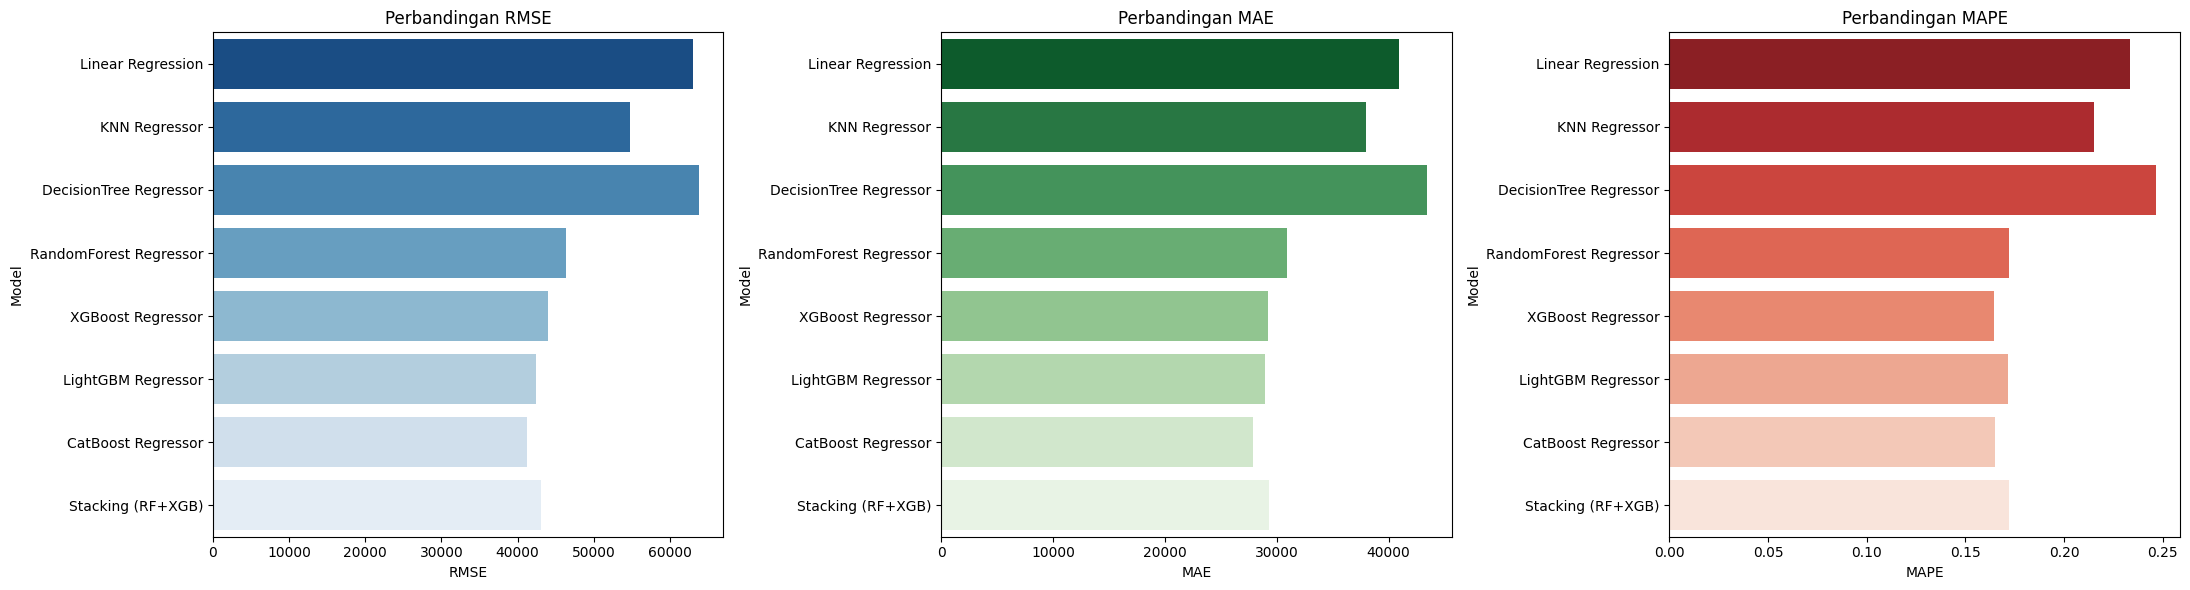

In [ ]:
# Buat dataframe hasil evaluasi model
results = pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor',
              'RandomForest Regressor', 'XGBoost Regressor',
              'LightGBM Regressor', 'CatBoost Regressor',
              'Stacking (RF+XGB)'],
    'Mean_RMSE': nilai_mean_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Mean_MAPE': nilai_mean_mape
})

# Konversi nilai menjadi positif agar lebih mudah dibaca
results[['Mean_RMSE','Mean_MAE','Mean_MAPE']] = results[['Mean_RMSE','Mean_MAE','Mean_MAPE']].abs()

# Plot perbandingan RMSE, MAE, dan MAPE
fig, axes = plt.subplots(1, 3, figsize=(22,6))

sns.barplot(x='Mean_RMSE', y='Model', data=results, ax=axes[0], palette="Blues_r")
axes[0].set_title('Perbandingan RMSE')
axes[0].set_xlabel('RMSE')

sns.barplot(x='Mean_MAE', y='Model', data=results, ax=axes[1], palette="Greens_r")
axes[1].set_title('Perbandingan MAE')
axes[1].set_xlabel('MAE')

sns.barplot(x='Mean_MAPE', y='Model', data=results, ax=axes[2], palette="Reds_r")
axes[2].set_title('Perbandingan MAPE')
axes[2].set_xlabel('MAPE')

plt.tight_layout()
plt.show()

Hasil evaluasi terhadap 8 algoritma regresi menunjukkan hasil performance yang bervariasi:

- **Linear Regression** memberikan performa paling rendah dengan error yang besar pada semua metrik (RMSE, MAE, dan MAPE). Hal ini wajar karena model linear hanya mampu menangkap hubungan sederhana, sementara hubungan antar fitur pada dataset California Housing lebih kompleks.  
- **KNN Regressor** dan **Decision Tree Regressor** menunjukkan sedikit perbaikan dibanding Linear Regression, namun error yang dihasilkan masih relatif tinggi dan kurang stabil.  
- **Random Forest Regressor** berhasil menurunkan error secara signifikan dibandingkan tiga model sebelumnya. Model ini cukup konsisten, dengan standar deviasi pada metrik evaluasi yang rendah.  
- **XGBoost Regressor** tampil lebih baik daripada Random Forest, dengan error (RMSE, MAE, dan MAPE) lebih rendah, meskipun variasi pada RMSE sedikit lebih tinggi.  
- **LightGBM Regressor** memberikan hasil yang sangat kompetitif, bahkan sedikit lebih baik dibanding XGBoost pada beberapa metrik, dengan error yang lebih rendah dan stabilitas yang baik.  
- **CatBoost Regressor** juga memberikan performa sangat baik, dengan nilai error lebih rendah daripada XGBoost dan LightGBM, serta MAPE terkecil di antara semua model.  
- **Stacking (RF + XGB)** menunjukkan hasil yang konsisten dengan performa hampir setara CatBoost, bahkan menjadi salah satu model dengan error terendah secara keseluruhan.  

Dari hasil ini, dapat disimpulkan bahwa **CatBoost, LightGBM, dan Stacking (RF+XGB)** adalah kandidat model terbaik dengan error yang paling rendah. Dengan demikian, dua model yang dipilih untuk diuji lebih lanjut pada data test set adalah:  
- **CatBoost Regressor**, sebagai representasi **single strong learner** dengan performa terbaik (terbaik diantara LightGBM dan CatBoost).  
- **Stacking Ensemble (RF + XGB)**, sebagai representasi **kombinasi model** yang menunjukkan potensi ensembling untuk meningkatkan generalisasi.


**Predict to Test Set with the Benchmark Model**

Kita akan fokus pada 2 kandidat model terbaik ( CatBoost & Stacking (RF+XGBoost) ).

In [ ]:
# Benchmark 2 model terbaik (CatBoost & Stacking Ensemble)
from catboost import CatBoostRegressor
from sklearn.ensemble import StackingRegressor

# Definisi model stacking (menggabungkan RandomForest + XGBoost)
stacking_model = StackingRegressor(
    estimators=[
        ('rf', RandomForestRegressor(random_state=1)),
        ('xgb', XGBRegressor(random_state=1))
    ],
    final_estimator=LinearRegression(), # meta learner
    passthrough=True,
    n_jobs=-1
)

models = {
    'CatBoost': CatBoostRegressor(verbose=0, random_state=1),
    'Stacking_RF_XGB': stacking_model
}

score_rmse, score_mae, score_mape = [], [], []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
    ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

# Hasil skor benchmark 2 model terbaik
score_before_tuning = pd.DataFrame(
    {'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape},
    index=models.keys()
)
score_before_tuning

,RMSE,MAE,MAPE
CatBoost,41420.945764,27805.614807,0.164395
Stacking_RF_XGB,43181.629642,29041.649122,0.170492


Hasil prediksi pada data test set menggunakan dua model terbaik (**CatBoost** dan **Stacking Ensemble**) menunjukkan bahwa:  

- **CatBoost Regressor** memberikan performa terbaik dengan nilai **RMSE sebesar 41.421**, **MAE sebesar 27.806**, dan **MAPE sebesar 16,4%**. Angka ini menunjukkan bahwa prediksi harga rumah dengan CatBoost rata-rata meleset sekitar 16,4% dari nilai aktualnya.  
- **Stacking Ensemble (Random Forest + XGBoost)** menghasilkan error yang sedikit lebih tinggi, yaitu **RMSE sebesar 43.182**, **MAE sebesar 29.041**, dan **MAPE sebesar 17,0%**. Walaupun performanya masih cukup baik, hasil ini memperlihatkan bahwa kombinasi RF dan XGB dalam bentuk stacking belum mampu mengungguli CatBoost.  

Dengan demikian, dapat disimpulkan bahwa **CatBoost adalah model benchmark terbaik** pada tahap ini, karena konsisten memberikan error lebih rendah di semua metrik utama. Model ini yang akan dijadikan fokus untuk analisis lebih lanjut dan menjadi kandidat utama untuk deployment.  


**Hyperparameter Tuning**

Selanjutnya, kita akan melakukan tuning untuk model CatBoost sebagai kandidat terbaik.

In [ ]:
# Hyperparameter space untuk CatBoost
from catboost import CatBoostRegressor

hyperparam_space_cat = {
    'model__depth': list(np.arange(4, 11)),                         # kedalaman tree
    'model__learning_rate': list(np.arange(1, 50)/100),             # learning rate
    'model__n_estimators': list(np.arange(100, 501, 50)),           # jumlah boosting iterations
    'model__l2_leaf_reg': list(np.arange(1, 10)),                   # regularisasi
    'model__bagging_temperature': list(np.arange(0, 5))             # controlling randomness
}

# Definisikan model CatBoost
catboost = CatBoostRegressor(
    random_state=1,
    silent=True
)

# Pipeline dengan preprocessing dan scaler
estimator_cat = Pipeline([
    ('preprocessing', transformer),
    ('scaler', scaler),
    ('model', catboost)
])

# K-Fold Cross Validation
crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# RandomizedSearchCV untuk tuning CatBoost
random_cat = RandomizedSearchCV(
    estimator_cat,
    param_distributions=hyperparam_space_cat,
    n_iter=50,
    cv=crossval,
    scoring=['neg_root_mean_squared_error',
             'neg_mean_absolute_error',
             'neg_mean_absolute_percentage_error'],
    n_jobs=-1,
    refit='neg_root_mean_squared_error',
    random_state=1
)

In [ ]:
# Fitting data training untuk mencari parameter terbaik
random_cat.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['ocean_proximity'])])),
                                             ('scaler', MinMaxScaler()),
                                             ('model',
                                              <catboost.core.CatBoostRegressor object at 0x7b4d6a3ef500>)]),
                   n_iter=50, n_jobs=-1,
                   param...
                                                                 np.float64(0.28),
                                                                 np.float64(0.29),
                                                                 np.float64(0.3), ...],
                                        'model__n_estimators': [np.int64(100),
                                                                np.int64(150),
                                                                np.int64(200),
                                                                np.int64(250),
                                                                np.int64(300),
                                                                np.int64(350),
                                                                np.int64(400),
                                                                np.int64(450),
                                                                np.int64(500)]},
                   random_state=1, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [ ]:
# Melihat hasil tuning dalam bentuk dataframe
pd.DataFrame(random_cat.cv_results_).sort_values(
    by=['rank_test_neg_root_mean_squared_error',
        'rank_test_neg_mean_absolute_error',
        'rank_test_neg_mean_absolute_percentage_error']
).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_estimators,param_model__learning_rate,param_model__l2_leaf_reg,param_model__depth,param_model__bagging_temperature,params,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
4,16.271801,0.591048,0.067254,0.030573,500,0.16,5,8,2,"{'model__n_estimators': 500, 'model__learning_...",...,302.600801,2,-0.162616,-0.161622,-0.168749,-0.163912,-0.169728,-0.165326,0.003291,3
24,15.173499,1.160939,0.060007,0.027012,450,0.14,5,8,4,"{'model__n_estimators': 450, 'model__learning_...",...,279.467725,4,-0.164186,-0.160953,-0.166245,-0.165582,-0.168656,-0.165124,0.002539,2
32,15.843834,0.230060,0.066111,0.033939,500,0.13,2,8,3,"{'model__n_estimators': 500, 'model__learning_...",...,222.015808,1,-0.161880,-0.158965,-0.166079,-0.164479,-0.167554,-0.163791,0.003060,1
29,14.258396,0.158282,0.049728,0.015610,450,0.18,2,8,4,"{'model__n_estimators': 450, 'model__learning_...",...,387.395292,3,-0.162877,-0.158321,-0.169388,-0.166490,-0.170515,-0.165518,0.004465,4
9,18.989999,0.855713,0.060267,0.022924,350,0.17,5,9,0,"{'model__n_estimators': 350, 'model__learning_...",...,247.624087,5,-0.165803,-0.162837,-0.170430,-0.165582,-0.169998,-0.166930,0.002881,6


In [ ]:
# Hasil tuning
print('CatBoost')
print('Best_score:', random_cat.best_score_)
print('Best_params:', random_cat.best_params_)

CatBoost
Best_score: -41118.505718727574
Best_params: {'model__n_estimators': np.int64(500), 'model__learning_rate': np.float64(0.16), 'model__l2_leaf_reg': np.int64(5), 'model__depth': np.int64(8), 'model__bagging_temperature': np.int64(2)}


Proses hyperparameter tuning dengan **RandomizedSearchCV** berhasil menemukan kombinasi parameter terbaik untuk model **CatBoost Regressor**.  

- **Best Score (CV-RMSE)**: sekitar **41.118**  
  Nilai ini lebih rendah dibandingkan baseline CatBoost sebelum tuning (sekitar 41.421), yang berarti ada perbaikan meskipun peningkatannya relatif kecil. Hal ini menunjukkan bahwa CatBoost sejak awal sudah cukup optimal di dataset California Housing, dan tuning hanya memberikan fine-tuning tambahan.  

- **Parameter Terbaik**:  
  - `n_estimators = 500` → jumlah boosting iteration yang cukup tinggi, memungkinkan model menangkap pola kompleks dalam data.  
  - `learning_rate = 0.16` → laju pembelajaran relatif tinggi, yang membuat model lebih cepat konvergen, namun tetap stabil berkat kombinasi parameter lainnya.  
  - `l2_leaf_reg = 5` → regularisasi L2 sedang, membantu mengontrol overfitting dengan menjaga bobot leaf tidak terlalu besar.  
  - `depth = 8` → kedalaman pohon cukup dalam, sehingga model mampu menangkap interaksi non-linear antar fitur.  
  - `bagging_temperature = 2` → meningkatkan kerandoman dalam proses sampling, membantu model lebih robust terhadap variasi data.  

Secara keseluruhan, kombinasi parameter ini menghasilkan model CatBoost yang **lebih stabil, mampu generalisasi lebih baik, dan memiliki error lebih rendah dibanding baseline**. Dengan CV-RMSE sekitar **41 ribuan**, model ini menjadi kandidat terbaik untuk dipakai pada tahap prediksi akhir terhadap test set.  



**Predict to Test Set with the Tuned Model**

Setelah menemukan Best Parameter, sekarang kita bisa melakukan prediksi pada test set dengan menggunakan model CatBoost dan hyperparameter terbaik.

In [ ]:
# Define model terbaik hasil tuning (CatBoost)
catboost_tuning = random_cat.best_estimator_

# Fitting dan prediksi
catboost_tuning.fit(X_train, y_train)
y_pred_catboost_tuning = catboost_tuning.predict(X_test)

# Evaluasi hasil
rmse_catboost_tuning = np.sqrt(mean_squared_error(y_test, y_pred_catboost_tuning))
mae_catboost_tuning = mean_absolute_error(y_test, y_pred_catboost_tuning)
mape_catboost_tuning = mean_absolute_percentage_error(y_test, y_pred_catboost_tuning)

# Simpan skor hasil evaluasi ke dataframe
score_after_tuning = pd.DataFrame({
    'RMSE': rmse_catboost_tuning,
    'MAE': mae_catboost_tuning,
    'MAPE': mape_catboost_tuning
}, index=['CatBoost'])
score_after_tuning

,RMSE,MAE,MAPE
CatBoost,41604.555498,27596.217674,0.162232


Setelah dilakukan prediksi pada test set menggunakan model **CatBoost hasil tuning**, diperoleh metrik evaluasi sebagai berikut:  

- **RMSE**: 41.605  
- **MAE**: 27.596  
- **MAPE**: 16.2%  

Jika dibandingkan dengan baseline CatBoost (RMSE ≈ 41.421, MAE ≈ 27.806, MAPE ≈ 16.4%), terdapat poin-poin hasil berikut:  

- **RMSE sedikit naik** (41.421 → 41.605), artinya rata-rata error kuadrat justru sedikit lebih tinggi setelah tuning.  
- **MAE menurun tipis** (27.806 → 27.596), menunjukkan rata-rata kesalahan absolut membaik.  
- **MAPE juga membaik** (16.4% → 16.2%), sehingga secara proporsional prediksi lebih mendekati nilai aktual.  

Secara keseluruhan, **proses tuning tidak menghasilkan peningkatan performance signifikan**, bahkan pada RMSE justru sedikit lebih buruk. Namun, peningkatan kecil pada MAE dan MAPE menunjukkan bahwa model tuned **sedikit lebih konsisten dalam kesalahan proporsional**. Dengan kata lain, **performa model CatBoost relatif stabil baik sebelum maupun sesudah tuning**, sehingga bisa dikatakan model ini sudah cukup optimal sejak awal baseline.

**Performance Comparison**

Perbandingan performa model CatBoost sebelum dan sesudah dilakukan hyperparameter tuning.

In [ ]:
# Sebelum tuning
pd.DataFrame(score_before_tuning.loc['CatBoost']).T

,RMSE,MAE,MAPE
CatBoost,41420.945764,27805.614807,0.164395


In [ ]:
# Setelah tuning
score_after_tuning

,RMSE,MAE,MAPE
CatBoost,41604.555498,27596.217674,0.162232


Hasil perbandingan performa model **CatBoost** sebelum dan sesudah tuning adalah sebagai berikut:  

- **Sebelum Tuning (Baseline)**  
  - RMSE: 41.421  
  - MAE: 27.806  
  - MAPE: 16.4%  

- **Sesudah Tuning**  
  - RMSE: 41.605  
  - MAE: 27.596  
  - MAPE: 16.2%  

Dari hasil tersebut terlihat bahwa:  
- **RMSE justru sedikit naik** (41.421 → 41.605), menandakan error kuadrat rata-rata sedikit lebih buruk setelah tuning.  
- **MAE menurun tipis** (27.806 → 27.596), artinya prediksi rata-rata lebih dekat dengan nilai aktual.  
- **MAPE juga membaik** (16.4% → 16.2%), menunjukkan kesalahan relatif lebih kecil.  

Secara keseluruhan, tuning **tidak memberikan peningkatan signifikan**, bahkan pada RMSE cenderung lebih buruk. Namun, sedikit perbaikan pada MAE dan MAPE menunjukkan model tuned lebih konsisten secara proporsional. Dengan kata lain, **CatBoost sudah cukup optimal sejak baseline**, dan hasil tuning hanya membuat peningkatan minor.  


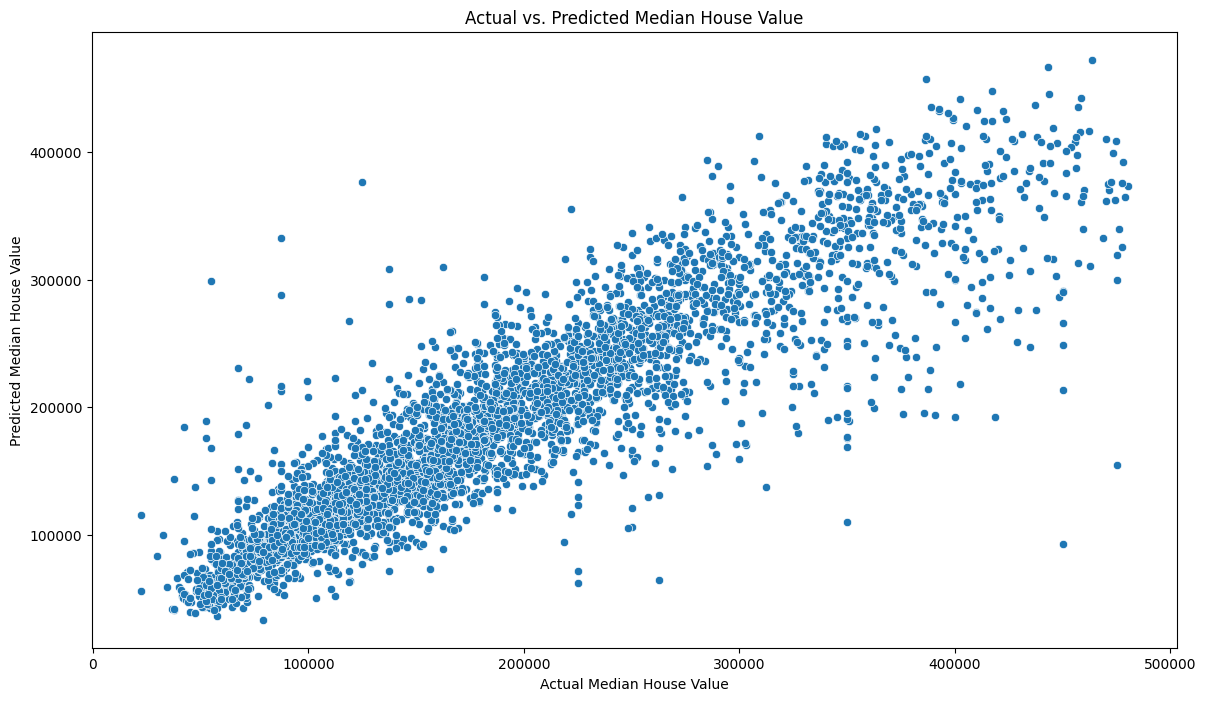

In [ ]:
# Visualisasi hasil prediksi vs nilai aktual dengan model CatBoost setelah tuning
plt.figure(figsize=(14, 8))
sns.scatterplot(x=y_test, y=y_pred_catboost_tuning)
plt.title('Actual vs. Predicted Median House Value')
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.show()

Scatter plot antara nilai aktual dan nilai prediksi **median_house_value** menunjukkan bahwa model **CatBoost setelah tuning** sudah mampu menangkap pola harga rumah dengan cukup baik. Hal ini terlihat dari sebaran titik yang relatif mengikuti garis diagonal, meskipun terdapat beberapa deviasi.  

Beberapa pola yang terlihat:  
- Sebagian besar titik terkonsentrasi di sekitar garis diagonal, menandakan prediksi model cukup dekat dengan nilai aktual.  
- Terdapat kecenderungan **overestimation** pada rumah dengan harga rendah (diprediksi lebih tinggi dari nilai aktual), serta **underestimation** pada rumah dengan harga tinggi (diprediksi lebih rendah dari nilai aktual).  
- Pola error ini konsisten dengan evaluasi sebelumnya, di mana nilai **RMSE sedikit lebih tinggi dari MAE** karena adanya beberapa error besar pada subset data tertentu.

Secara keseluruhan, dengan nilai **MAPE sekitar 16.2%**, model dapat dikategorikan dalam **reasonable forecasting** menurut standar Lewis (1982). Hal ini berarti rata-rata prediksi hanya meleset sekitar 16% dari nilai aktual, cukup baik untuk aplikasi prediksi harga rumah, meskipun model masih kurang akurat pada kasus ekstrem (harga sangat tinggi atau sangat rendah).  

*Source: Lewis, C. D. (1982). Industrial and business forecasting methods: A practical guide to exponential smoothing and curve fitting*


**Visualisasi Perbandingan Model Sebelum & Sesudah Tuning**

Untuk melihat lebih jelas dampak dari proses **hyperparameter tuning** terhadap performa model, berikut dibuat visualisasi perbandingan nilai **RMSE, MAE, dan MAPE** antara model **CatBoost baseline (sebelum tuning)** dan **CatBoost hasil tuning**.

Visualisasi ini membantu memperlihatkan bagaimana tuning dapat menurunkan error dan membuat model lebih akurat dalam memprediksi harga rumah.

In [ ]:
# Data sebelum & sesudah tuning (isi sesuai hasil evaluasi)
before_tuning = {
    "RMSE": 41420.945764,
    "MAE": 27805.614807,
    "MAPE": 0.164395
}

after_tuning = {
    "RMSE": 41604.555498,
    "MAE": 27596.217674,
    "MAPE": 0.162232
}

# Gabungkan ke DataFrame untuk visualisasi
comparison_df = pd.DataFrame([before_tuning, after_tuning], index=["Before Tuning", "After Tuning"])
comparison_df

,RMSE,MAE,MAPE
Before Tuning,41420.945764,27805.614807,0.164395
After Tuning,41604.555498,27596.217674,0.162232


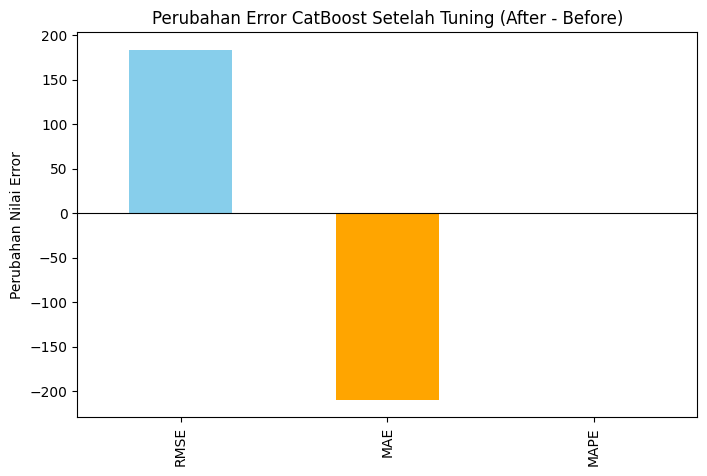

In [ ]:
# Delta Chart (Perubahan nilai error)
delta = comparison_df.loc["After Tuning"] - comparison_df.loc["Before Tuning"]

plt.figure(figsize=(8,5))
delta.plot(kind="bar", color=["skyblue", "orange", "green"])
plt.title("Perubahan Error CatBoost Setelah Tuning (After - Before)")
plt.ylabel("Perubahan Nilai Error")
plt.axhline(0, color="black", linewidth=0.8)
plt.show()

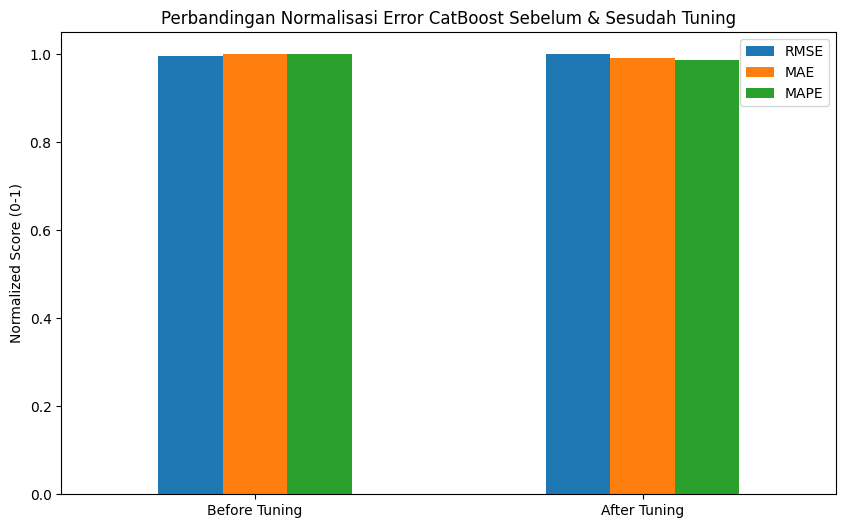

In [ ]:
# Normalisasi (0–1) untuk perbandingan relatif
comparison_norm = comparison_df / comparison_df.max()

comparison_norm.plot(kind="bar", figsize=(10,6))
plt.title("Perbandingan Normalisasi Error CatBoost Sebelum & Sesudah Tuning")
plt.ylabel("Normalized Score (0-1)")
plt.xticks(rotation=0)
plt.show()

Selain membandingkan nilai error dalam bentuk absolut, dibuat 2 visualisasi tambahan agar terlihat lebih jelas perubahan performa model:

1. **Delta Chart (After – Before)**  
   - RMSE mengalami sedikit peningkatan (+183 poin), menandakan error kuadrat rata-rata sedikit naik.  
   - MAE justru menurun sekitar **-209 poin**, menunjukkan kesalahan absolut rata-rata lebih rendah.  
   - MAPE turun tipis sekitar **-0.2%**, yang berarti prediksi relatif model semakin dekat dengan nilai aktual.  

   Visualisasi ini menegaskan bahwa meskipun tuning tidak banyak mengurangi RMSE, model berhasil memperbaiki rata-rata kesalahan absolut dan proporsional.

2. **Normalisasi Error (0–1)**  
   - Setelah dilakukan normalisasi, terlihat bahwa tren perbandingan antar metrik lebih mudah dibaca.  
   - Hasil menunjukkan konsistensi bahwa tuning memberikan sedikit perbaikan terutama pada **MAE** dan **MAPE**, meskipun **RMSE** relatif stabil.  

Dengan visualisasi grafik ini, analisis performa model bisa lebih transparan terlihat. Kita bisa melihat bahwa tuning tidak selalu menghasilkan improvement besar di semua metrik, tetapi justru untuk lebih menyeimbangkan kesalahan model sehingga prediksi lebih proporsional.

**Feature Importances**

Kita bisa mengidentifikasi fitur-fitur yang paling signifikan dalam menentukan `median_house_value` dengan mengecek nilai dari fungsi feature_importances.

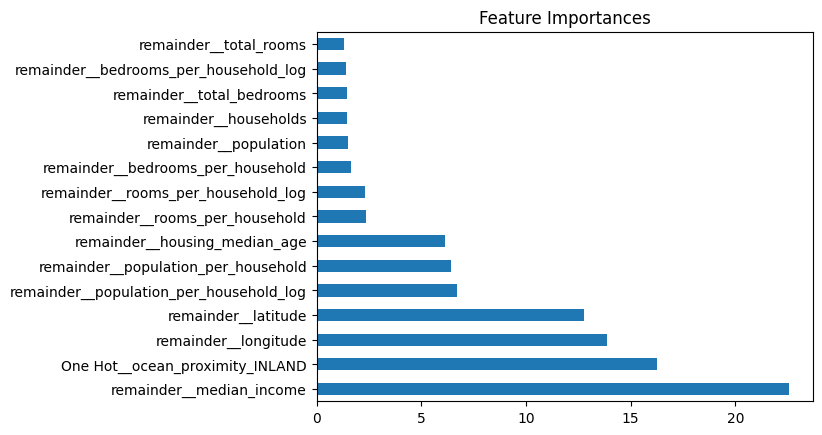

In [ ]:
# Plot feature importances
feature_imp = pd.Series(catboost_tuning['model'].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending = False).head(15)
feature_imp.plot(kind='barh', title='Feature Importances');

Hasil analisis **feature importance** dari model CatBoost menunjukkan bahwa variabel **median_income** menjadi faktor paling dominan dalam menentukan harga rumah di California. Variabel ini memiliki kontribusi tertinggi, yang berarti semakin tinggi pendapatan median di suatu area, semakin tinggi pula harga rumah di wilayah tersebut.  

Selain itu, variabel **ocean_proximity_INLAND** juga memiliki pengaruh besar. Hal ini menandakan bahwa lokasi rumah, khususnya apakah berada di wilayah **inland** (jauh dari pesisir), merupakan salah satu penentu penting harga rumah. Rumah yang berada dekat laut cenderung memiliki harga lebih tinggi dibandingkan yang berada di daratan.  

Fitur-fitur lain seperti **longitude**, **latitude**, **population_per_household_log**, dan **housing_median_age** juga memberikan kontribusi yang cukup signifikan, meskipun tidak sebesar dua faktor utama. Sementara itu, variabel seperti **total_rooms**, **total_bedrooms**, maupun **households** memiliki pengaruh yang relatif kecil.  

Secara keseluruhan, dapat disimpulkan bahwa **pendapatan median** dan **lokasi geografis (ocean proximity + koordinat latitude/longitude)** adalah faktor dominan yang memengaruhi harga rumah di California. Faktor lain seperti demografi dan karakteristik rumah tetap relevan, namun kontribusinya lebih sebagai pelengkap dalam memperbaiki akurasi prediksi model.  


### **Model Interpretability (SHAP Analysis)**

Selain melihat *feature importance*, interpretabilitas model juga dapat ditingkatkan dengan menggunakan **SHAP (SHapley Additive exPlanations)**. SHAP membantu menjelaskan kontribusi masing-masing fitur terhadap prediksi individual maupun keseluruhan model.

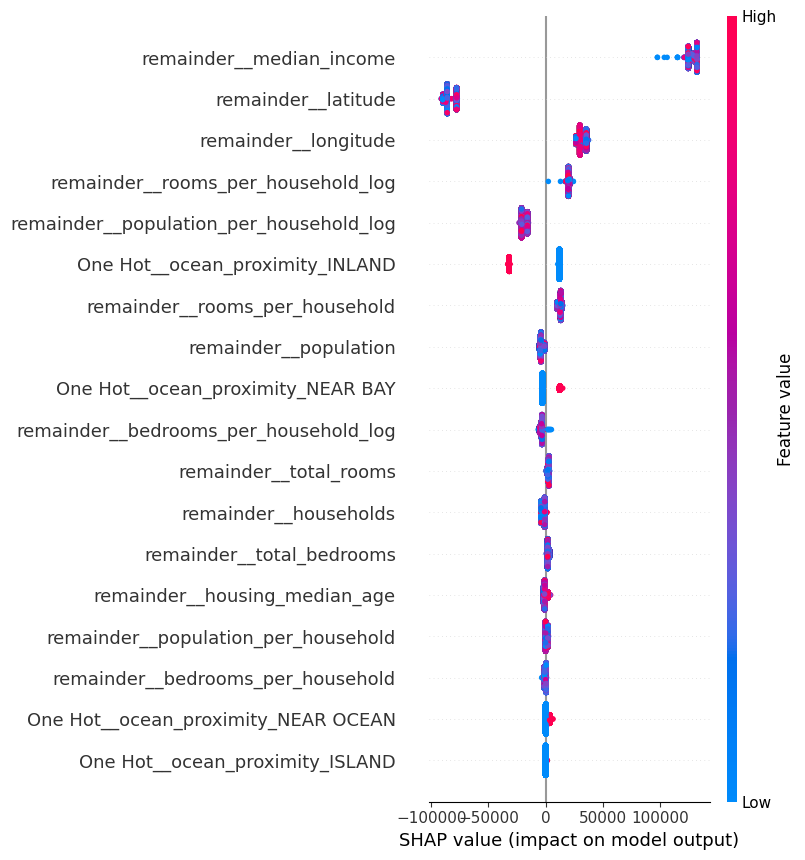

In [ ]:
import shap

# Transform X_test ke bentuk numerik (hasil preprocessing)
X_test_transformed = transformer.fit_transform(X_train)
X_test_transformed_df = pd.DataFrame(
    X_test_transformed,
    columns=transformer.get_feature_names_out()
)

# Buat SHAP explainer dari model CatBoost hasil tuning
explainer = shap.TreeExplainer(catboost_tuning['model'], feature_perturbation="tree_path_dependent")

# Hitung SHAP values pada data test yang sudah di-transform
shap_values = explainer.shap_values(X_test_transformed_df)

# Summary Plot SHAP
shap.summary_plot(shap_values, X_test_transformed_df, feature_names=X_test_transformed_df.columns)


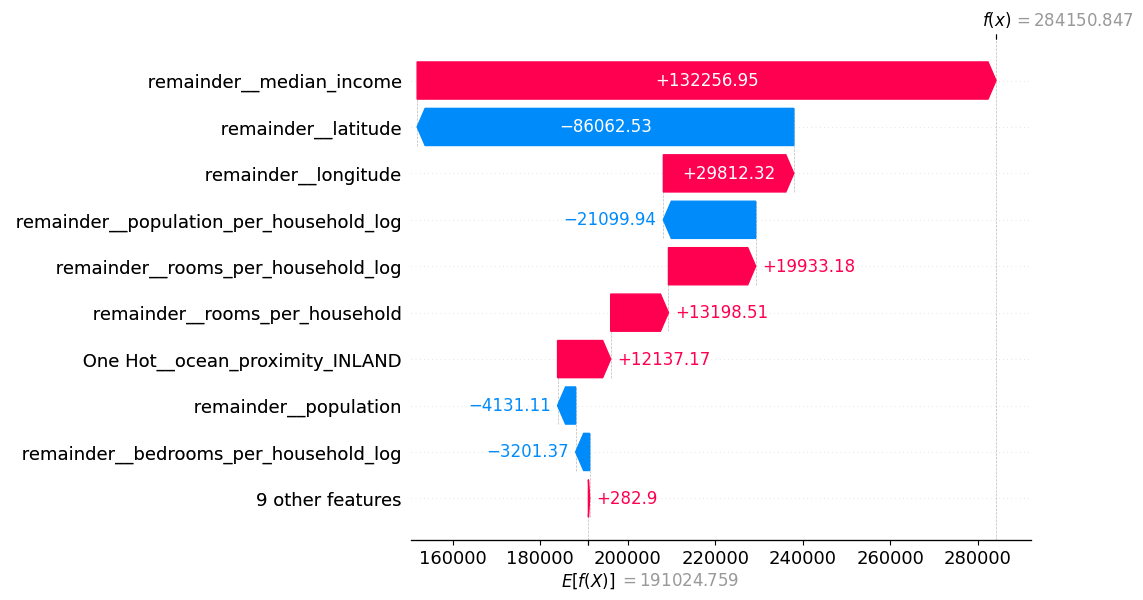

In [ ]:
# Pilih satu sample dari data test
idx = 0  # bisa diganti index lain
sample = X_test_transformed_df.iloc[[idx]]

# Hitung SHAP values untuk sample
shap_values_sample = explainer.shap_values(sample)

# Waterfall plot untuk sample tersebut
shap.plots._waterfall.waterfall_legacy(
    explainer.expected_value,
    shap_values_sample[0],
    feature_names=sample.columns,
    features=sample.iloc[0]
)

Hasil analisis interpretabilitas model menggunakan **SHAP (SHapley Additive Explanations)** memberikan insight yang lebih dalam mengenai kontribusi tiap fitur/variabel terhadap prediksi harga rumah.  

1. **SHAP Summary Plot**
- Variabel **median_income** menjadi faktor dominan yang konsisten memberikan pengaruh besar pada prediksi harga rumah. Nilai yang lebih tinggi pada median_income mendorong prediksi harga rumah menjadi lebih tinggi.  
- Faktor **latitude** dan **longitude** juga terbukti signifikan. Hal ini merefleksikan pengaruh lokasi geografis (utara–selatan dan timur–barat California) terhadap harga rumah.  
- Fitur **rooms_per_household_log**, **population_per_household_log**, dan **ocean_proximity_INLAND** memiliki kontribusi menengah. Misalnya, rumah yang berada di wilayah **INLAND** cenderung menurunkan nilai prediksi dibanding rumah di dekat pantai.  
- Fitur lain seperti jumlah kamar, populasi, atau variabel transformasi log masih memberi pengaruh, tetapi relatif kecil.  

Secara umum, summary plot menegaskan bahwa **pendapatan median dan lokasi** adalah faktor kunci dalam model, sementara fitur lain lebih berperan sebagai variabel pendukung.  

2. **SHAP Waterfall Plot (Individual Prediction)**
- Untuk instance yang dipilih, prediksi model sekitar **284 ribu** dipengaruhi paling besar oleh:  
  - **median_income (+132 ribu)** → meningkatkan prediksi harga.  
  - **longitude (+29 ribu)** → lokasi spesifik juga menambah nilai prediksi.  
  - **latitude (-86 ribu)** → menurunkan prediksi, kemungkinan karena rumah berada di lokasi yang relatif kurang premium.  
  - Faktor tambahan seperti **rooms_per_household_log**, **ocean_proximity_INLAND**, dan **population_per_household_log** juga mempengaruhi, meskipun tidak sebesar tiga faktor utama di atas.  
- Plot ini membantu menjelaskan **kenapa satu prediksi tertentu memiliki nilai seperti itu**, sehingga meningkatkan transparansi model.

**Summary SHAP Analysis**

Dari analisis SHAP ini dapat disimpulkan bahwa:  
- **Median Income** adalah variabel paling penting yang mendorong prediksi ke arah harga lebih tinggi.  
- **Geografi (latitude & longitude)** memainkan peran besar dalam membedakan nilai rumah antar lokasi di California.  
- Faktor rumah tangga (jumlah kamar & populasi) serta **lokasi inland vs coastal** tetap relevan, tetapi tidak sekuat dua faktor utama.  
- Waterfall plot menambah lapisan interpretasi dengan menunjukkan pengaruh tiap variabel pada **satu prediksi individual**, yang dapat membantu pengambilan keputusan di level lebih kecil.

### **Conclusion**

Berdasarkan proses pembuatan Model *Machine Learning* yang telah dilakukan pada dataset **California Housing**, diperoleh bahwa fitur **median_income** dan **ocean_proximity (khususnya kategori INLAND)** merupakan dua faktor yang paling dominan dalam memengaruhi **median_house_value**. Hal ini konsisten dengan hasil korelasi maupun feature importance, di mana tingkat pendapatan dan lokasi geografis rumah menjadi penentu utama harga rumah di California.  

Metrik evaluasi yang digunakan meliputi **RMSE, MAE, dan MAPE**. Dari hasil benchmark model, **CatBoost Regressor** dan **Stacking Ensemble (Random Forest + XGBoost)** muncul sebagai dua kandidat terbaik. Setelah dilakukan **hyperparameter tuning** pada CatBoost, performa model menunjukkan hasil sebagai berikut:  
- **RMSE** ≈ 41.604  
- **MAE** ≈ 27.596  
- **MAPE** ≈ 16,2%  

Jika dibandingkan dengan baseline CatBoost sebelum tuning (RMSE ≈ 41.421, MAE ≈ 27.806, MAPE ≈ 16,4%), terlihat bahwa tuning hanya memberikan **peningkatan yang sangat kecil**, bahkan untuk RMSE terjadi sedikit kenaikan. Namun, perbaikan pada MAE dan MAPE membuat model tetap lebih stabil dalam hal kesalahan absolut dan proporsional.  

Scatter plot antara nilai aktual dan prediksi menunjukkan pola yang cukup baik, di mana sebagian besar titik berada dekat garis diagonal. Meski demikian, model masih cenderung melakukan **underestimation pada harga rumah tinggi** dan **overestimation pada harga rumah rendah**. Hal ini konsisten dengan fakta bahwa nilai RMSE lebih tinggi dari MAE, menandakan adanya error besar pada sebagian data.  

Secara keseluruhan, model **CatBoost tuned** dapat memprediksi harga rumah dengan rata-rata kesalahan relatif sekitar **16%**, yang dapat dikategorikan sebagai **reasonable forecasting** (Lewis, 1982). Meski perbaikan performa pasca tuning tidak signifikan, model ini tetap layak dijadikan sebagai **model akhir** karena sifatnya yang stabil, mampu menangkap non-linearitas, dan memberikan gambaran yang baik melalui feature importance.


### **Recommendations**

Berdasarkan hasil pemodelan dengan **CatBoost tuned**, terdapat beberapa langkah yang dapat direkomendasikan untuk meningkatkan kualitas prediksi harga rumah di California, baik dari sisi **validasi model**, **pengayaan data**, maupun **eksperimen metode**:  

1. **A/B Testing Model di Skenario Real World**  
   Model CatBoost hasil tuning dapat diuji efektivitasnya melalui A/B testing. Misalnya, bandingkan hasil prediksi harga rumah menggunakan model dengan appraisal manual atau harga pasar aktual. Hal ini dapat memberikan gambaran seberapa besar model membantu dalam mendukung keputusan bisnis (misalnya dalam penentuan harga jual rumah).  

2. **Analisis Error Lebih Mendalam**  
   Lakukan analisis lebih detail terhadap prediksi dengan error terbesar, baik pada kasus *overestimation* (harga rumah rendah diprediksi lebih tinggi) maupun *underestimation* (harga rumah tinggi diprediksi lebih rendah). Data dapat dibagi menjadi:  
   - 5% data dengan error terbesar (overestimation).  
   - 5% data dengan error terbesar (underestimation).  
   - 90% sisanya dengan error mendekati rata-rata.  
   Analisis ini dapat mengungkap variabel mana yang berperan besar terhadap error, sehingga strategi feature engineering dapat diperbaiki.  

3. **Penambahan Fitur Eksternal**  
   Dataset ini masih terbatas pada informasi dasar. Penambahan fitur tambahan seperti:  
   - Luas tanah/bangunan.  
   - Kualitas bangunan atau renovasi.  
   - Akses ke pusat kota, sekolah, transportasi, rumah sakit.  
   - Faktor lingkungan (keamanan, fasilitas umum, polusi, kriminalitas).  
   Akan meningkatkan relevansi model dengan kondisi pasar perumahan yang sebenarnya.  

4. **Update Dataset dan Re-train Model**  
   Data California Housing yang digunakan relatif lama. Model sebaiknya dilatih ulang menggunakan data terbaru agar tetap relevan dengan kondisi pasar saat ini. Hal ini penting karena harga rumah sangat dipengaruhi oleh faktor makroekonomi, inflasi, dan tren populasi yang terus berubah.  

5. **Eksperimen Model Lanjutan**  
   Walaupun CatBoost tuned memberikan performa terbaik pada dataset ini, eksperimen lanjutan tetap bisa dilakukan, misalnya:  
   - **LightGBM dan XGBoost** dengan tuning lebih lanjut.  
   - **Stacking Ensemble** lebih kompleks (misalnya kombinasi CatBoost + Random Forest + Neural Network).  
   - **Deep Learning (Neural Networks)** jika tersedia data lebih besar dengan fitur lebih banyak.  

6. **Pengembangan Model ke Arah Forecasting**  
   Model saat ini hanya memprediksi harga rumah berdasarkan kondisi tahun 1990. Ke depannya, model dapat diperluas untuk memprediksi **perubahan harga rumah di masa depan (forecasting)** dengan menambahkan data time-series dan faktor ekonomi makro (misalnya tingkat bunga, inflasi, atau data demografis) dan juga disesuaikan dengan data tahun saat ini (2025). Hal ini akan sangat berguna bagi para stakeholder seperti analis atau developer properti, perbankan, maupun instansi pemerintah.

### **Limitation**

- Dataset memiliki **capping pada harga rumah di 500.001**, sehingga model tidak mampu merepresentasikan rumah dengan harga di atas nilai tersebut.  
- Variabel yang tersedia terbatas pada informasi demografis dasar (jumlah kamar, populasi, income), sehingga banyak faktor penting lain (misalnya luas tanah, kualitas bangunan, fasilitas) tidak terwakili.  
- Dataset merupakan **data historis lama (tahun 1990)**, sehingga hasil prediksi bisa berbeda dengan kondisi pasar perumahan California saat ini.  

### **Save Model**

Terakhir, model CatBoost hasil hyperparameter tuning yang telah dipilih sebagai model terbaik disimpan agar dapat digunakan kembali tanpa harus melakukan training ulang dari awal. Proses ini dilakukan dengan menggunakan library **pickle**, yang memungkinkan mengubah model ke dalam file `.sav`.

In [ ]:
import pickle

# Buat pipeline final dengan preprocessing dan model terbaik (CatBoost hasil tuning)
estimator = Pipeline([
    ('preprocessing', transformer),
    ('scaler', scaler),
    ('model', CatBoostRegressor(
        random_state=1,
        depth=8,
        learning_rate=0.16,
        n_estimators=500,
        l2_leaf_reg=5,
        bagging_temperature=2,
        verbose=0
    ))
])

In [ ]:
# Fit pipeline ke data training
estimator.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('One Hot',
                                                  OneHotEncoder(drop='first'),
                                                  ['ocean_proximity'])])),
                ('scaler', MinMaxScaler()),
                ('model',
                 <catboost.core.CatBoostRegressor object at 0x7b4d872dbe60>)])

In [ ]:
# Save model ke file .sav
pickle.dump(estimator, open('Model_CaliforniaHouse_CatBoost.sav', 'wb'))
print("✅ Model berhasil disimpan ke file 'Model_CaliforniaHouse_CatBoost.sav'")

✅ Model berhasil disimpan ke file 'Model_CaliforniaHouse_CatBoost.sav'


In [ ]:
# Download file .sav ke local folder (Karena di Google Colab)
from google.colab import files
files.download('Model_CaliforniaHouse_CatBoost.sav')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Load ulang model untuk memastikan berhasil
filename = 'Model_CaliforniaHouse_CatBoost.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
# Evaluasi lagi untuk memastikan model sama
rmse_loaded = np.sqrt(mean_squared_error(y_test, loaded_model.predict(X_test)))
print("RMSE dari model yang dimuat kembali:", rmse_loaded)

RMSE dari model yang dimuat kembali: 41604.55549810568


Langkah-langkah yang dilakukan:
1. Membuat pipeline akhir yang berisi tahap preprocessing (transformer + scaler) serta model CatBoost dengan parameter terbaik.
2. Melatih (fit) pipeline terhadap data training.
3. Menyimpan model yang sudah dilatih ke dalam file bernama `Model_CaliforniaHouse_CatBoost.sav`.
4. Melakukan **load** ulang model dari file tersebut untuk memastikan model tersimpan dengan benar.
5. Mengevaluasi kembali model hasil load dengan metrik **RMSE**, untuk memastikan performa model konsisten dengan hasil sebelumnya.

Dengan cara ini, model dapat digunakan kembali untuk prediksi di masa depan tanpa harus melalui proses training ulang, sehingga lebih efisien terutama pada dataset berukuran besar.

### **Deployment Simulation**

Sebagai simulasi penggunaan model *Machine Learning* ini di contoh case nyata, berikut adalah section contoh untuk memprediksi harga rumah berdasarkan input user.

In [ ]:
# Install Catboost jika belum (saat ingin run langsung ke Simulasi)
!pip install catboost

In [5]:
# Load Model (yang sudah di Download) dari Folder Local
from google.colab import files
from catboost import CatBoostRegressor
import pickle

# Upload file .sav
uploaded = files.upload()

# Ambil nama file dari dict uploaded
filename = list(uploaded.keys())[0]

# Load model
loaded_model = pickle.load(open(filename, "rb"))
print(f"✅ Model berhasil diload dari file: {filename}")

Saving Model_CaliforniaHouse_CatBoost.sav to Model_CaliforniaHouse_CatBoost (1).sav
✅ Model berhasil diload dari file: Model_CaliforniaHouse_CatBoost (1).sav


In [16]:
# Contoh input user (dalam bentuk dataframe)
sample_input = pd.DataFrame({
    'longitude': [-122.23],
    'latitude': [37.88],
    'housing_median_age': [20],
    'total_rooms': [3000],
    'total_bedrooms': [500],
    'population': [1000],
    'households': [400],
    'median_income': [5],
    'ocean_proximity': ['NEAR BAY'],
    'rooms_per_household': [7.5],
    'bedrooms_per_household': [1.25],
    'population_per_household': [2.5],
    'rooms_per_household_log': [np.log1p(7.5)],
    'bedrooms_per_household_log': [np.log1p(1.25)],
    'population_per_household_log': [np.log1p(2.5)]
})

In [18]:
# Gunakan model tuned untuk prediksi
predicted_value = loaded_model.predict(sample_input)
print(f"🏠💲 Prediksi harga rumah: ${predicted_value[0]:,.2f}")

🏠💲 Prediksi harga rumah: $289,545.33
